In [1]:
# Change width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

# Section 5: PCA
First, I'm going to import the VOCAB table to see which words get associated with each component. Then I will import the big and the small TFIDF tables I created in previous section, as well as the LIB table because we want our visualizations to be readable.

In [3]:
OHCO = ['industry_num','company_num','sent_num','token_num']

In [4]:
VOCAB = pd.read_csv('VOCAB2.csv').rename(columns={"term_id":'token_num'}).set_index(OHCO[3])
VOCAB

term_rank                                           term_str  \
token_num                                                                 
3851               1                                                and   
39883              2                                                the   
40328              3                                                 to   
28693              4                                                 of   
20910              5                                                 in   
...              ...                                                ...   
20198          44848  httpsprofilessuperlawyerscomtexashoustonlawfir...   
20197          44849               httpsplusgooglecomphishlabsteamposts   
20196          44850       httpsplusgooglecom100322699356187772951posts   
20195          44851                    httpspitchliveplancomfiixqfycuj   
44851          44852                                             ﬂavors   

               n  num  stop  \
token_num                     
3851       47740    0     1   
39883      33537    0     1   
40328      23607    0     1   
28693      20177    0     1   
20910      19717    0     1   
...          ...  ...   ...   
20198          1    0     0   
20197          1    0     0   
20196          1    0     0   
20195          1    0     0   
44851          1    0     0   

                                                      p_stem pos_max  zipf_k  \
token_num                                                                      
3851                                                     and      CC   47740   
39883                                                    the      DT   67074   
40328                                                     to      TO   70821   
28693                                                     of      IN   80708   
20910                                                     in      IN   98585   
...                                                      ...     ...     ...   
20198      httpsprofilessuperlawyerscomtexashoustonlawfir...      NN   44848   
20197                    httpsplusgooglecomphishlabsteampost     NNS   44849   
20196            httpsplusgooglecom100322699356187772951post     NNS   44850   
20195                        httpspitchliveplancomfiixqfycuj      NN   44851   
44851                                                  ﬂavor     NNP   44852   

                  p         h  df      idf  tfidf_mean  tfidf_sum  \
token_num                                                           
3851       0.053034  0.224701  40  0.00000     0.00000    0.00000   
39883      0.037256  0.176831  40  0.00000     0.00000    0.00000   
40328      0.026225  0.137757  40  0.00000     0.00000    0.00000   
28693      0.022414  0.122818  40  0.00000     0.00000    0.00000   
20910      0.021903  0.120747  40  0.00000     0.00000    0.00000   
...             ...       ...  ..      ...         ...        ...   
20198      0.000001  0.000022   1  1.60206     1.60206    1.60206   
20197      0.000001  0.000022   1  1.60206     1.60206    1.60206   
20196      0.000001  0.000022   1  1.60206     1.60206    1.60206   
20195      0.000001  0.000022   1  1.60206     1.60206    1.60206   
44851      0.000001  0.000022   1  1.60206     1.60206    1.60206   

           tfidf_median  tfidf_max        h2  x_factor  
token_num                                               
3851            0.00000    0.00000  4.414905  0.000000  
39883           0.00000    0.00000  4.418561  3.062713  
40328           0.00000    0.00000  4.386022  4.818537  
28693           0.00000    0.00000  4.381877  6.074572  
20910           0.00000    0.00000  4.356239  7.011097  
...                 ...        ...       ...       ...  
20198           1.60206    1.60206  0.000000  0.000000  
20197           1.60206    1.60206  0.000000  0.000000  
20196           1.60206    1.60206  0.000000  0.000000  
20195           1.60206    1.60206  0.000000  0.000000  
44851   

In [5]:
LIB = pd.read_csv("LIB.csv").set_index(OHCO[1])
LIB

Organization Name          Industry Groups  \
company_num                                                        
1102                   Chili Technology            Manufacturing   
1122                  Briggs & Stratton            Manufacturing   
1404         Volvo Trucks North America            Manufacturing   
1440                    Soltec Trackers            Manufacturing   
1542                          Synchrony            Manufacturing   
...                                 ...                      ...   
47187                        clearspace    Professional Services   
47190                 ORS Partners, LLC  Administrative Services   
47192                        OPENonline     Privacy and Security   
47193                  Vantage Partners        Internet Services   
47196                             Cadre    Professional Services   

             Industry_Index  
company_num                  
1102                     24  
1122                     24  
1404                     24  
1440                     24  
1542                     24  
...                     ...  
47187                    31  
47190                     0  
47192                    30  
47193                    23  
47196                    31  

[12031 rows x 3 columns]

In [6]:
TOKEN = pd.read_csv('TOKEN2.csv').rename(columns={"Unnamed: 3":'token_num'}).set_index(OHCO)
TOKEN

pos_tuple   pos  \
industry_num company_num sent_num token_num                                
24           1102        0        0          ('ChiliSleep', 'NNP')   NNP   
                                  1                  ('is', 'VBZ')   VBZ   
                                  2                    ('a', 'DT')    DT   
                                  3                ('sleep', 'JJ')    JJ   
                                  4           ('technology', 'NN')    NN   
...                                                            ...   ...   
31           47196       5        14                 ('for', 'IN')    IN   
                                  15               ('our', 'PRP$')  PRP$   
                                  16           ('portfolio', 'NN')    NN   
                                  17                  ('of', 'IN')    IN   
                                  18          ('companies.', 'NN')    NN   

                                              token_str    term_str  \
industry_num company_num sent_num token_num                           
24           1102        0        0          ChiliSleep  chilisleep   
                                  1                  is          is   
                                  2                   a           a   
                                  3               sleep       sleep   
                                  4          technology  technology   
...                                                 ...         ...   
31           47196       5        14                for         for   
                                  15                our         our   
                                  16          portfolio   portfolio   
                                  17                 of          of   
                                  18         companies.   companies   

                                             Industry_Index  \
industry_num company_num sent_num token_num                   
24           1102        0        0                      24   
                                  1                      24   
                                  2                      24   
                                  3                      24   
                                  4                      24   
...                                                     ...   
31           47196       5        14                     31   
                                  15                     31   
                                  16                     31   
                                  17                     31   
                                  18                     31   

                                                           pos_max  \
industry_num company_num sent_num token_num                          
24           1102        0        0          ('ChiliSleep', 'NNP')   
                                  1                  ('is', 'VBZ')   
                                  2                    ('a', 'DT')   
                                  3                ('sleep', 'JJ')   
                                  4           ('technology', 'NN')   
...                                                            ...   
31           47196       5        14                 ('for', 'IN')   
                                  15               ('our', 'PRP$')   
                                  16           ('portfolio', 'NN')   
                                  17                  ('of', 'IN')   
                                  18          ('companies', 'NNS')   

                                                 Ind_Word_Tuple  \
industry_num company_num sent_num token_num                       
24           1102        0        0          ('ChiliSleep', 24)   
                                  1                  ('is', 24)   
                                  2                   ('a', 24)   
                                  3               ('sleep', 24)   
           

### Reduce the number of features by removing proper nouns and insignificant words (based on TFIDF sum)
# Note to self: could also reduce based on XFactor, which performed well in the previous section

In [7]:
#how to drop rows that contain a certain string
#https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
    
#https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
# proper noun: NNP and NNPS for plural

# if just dropping one thing (NNP) use .contains
#new_TOKEN[~new_TOKEN.pos.str.contains('NNP')]

# if dropping more than one thing (NNP and NNPS) use .isin
TOKEN_reduced = TOKEN[~TOKEN.pos.isin(['NNP','NNPS'])]
TOKEN_reduced

pos_tuple   pos  \
industry_num company_num sent_num token_num                               
24           1102        0        1                 ('is', 'VBZ')   VBZ   
                                  2                   ('a', 'DT')    DT   
                                  3               ('sleep', 'JJ')    JJ   
                                  4          ('technology', 'NN')    NN   
                                  5               ('brand', 'NN')    NN   
...                                                           ...   ...   
31           47196       5        14                ('for', 'IN')    IN   
                                  15              ('our', 'PRP$')  PRP$   
                                  16          ('portfolio', 'NN')    NN   
                                  17                 ('of', 'IN')    IN   
                                  18         ('companies.', 'NN')    NN   

                                              token_str    term_str  \
industry_num company_num sent_num token_num                           
24           1102        0        1                  is          is   
                                  2                   a           a   
                                  3               sleep       sleep   
                                  4          technology  technology   
                                  5               brand       brand   
...                                                 ...         ...   
31           47196       5        14                for         for   
                                  15                our         our   
                                  16          portfolio   portfolio   
                                  17                 of          of   
                                  18         companies.   companies   

                                             Industry_Index  \
industry_num company_num sent_num token_num                   
24           1102        0        1                      24   
                                  2                      24   
                                  3                      24   
                                  4                      24   
                                  5                      24   
...                                                     ...   
31           47196       5        14                     31   
                                  15                     31   
                                  16                     31   
                                  17                     31   
                                  18                     31   

                                                          pos_max  \
industry_num company_num sent_num token_num                         
24           1102        0        1                 ('is', 'VBZ')   
                                  2                   ('a', 'DT')   
                                  3               ('sleep', 'JJ')   
                                  4          ('technology', 'NN')   
                                  5               ('brand', 'NN')   
...                                                           ...   
31           47196       5        14                ('for', 'IN')   
                                  15              ('our', 'PRP$')   
                                  16          ('portfolio', 'NN')   
                                  17                 ('of', 'IN')   
                                  18         ('companies', 'NNS')   

                                                 Ind_Word_Tuple  \
industry_num company_num sent_num token_num                       
24           1102        0        1                  ('is', 24)   
                                  2                   ('a', 24)   
                                  3               ('sleep', 24)   
                                  4          ('technology', 24)   
                                  5 

We reduced the set from 900,180 to 796,588.

In [29]:
VOCAB_reduced = VOCAB.sort_values('tfidf_sum', ascending=False).head(4000)
VOCAB_reduced

term_rank        term_str    n  num  stop        p_stem pos_max  \
token_num                                                                    
5508             102            bank  908    0     0          bank     NNP   
43745            238            wine  457    0     0          wine      NN   
37846            187        staffing  553    0     0          staf     VBG   
25627             95         medical  949    0     0         medic      JJ   
38423            120        students  829    0     0       student     NNS   
...              ...             ...  ...  ...   ...           ...     ...   
30037           6202       pathology   10    0     0      patholog      NN   
34771           6184          rotary   10    0     0        rotari     NNP   
26444           6227              mj   10    0     0            mj     NNP   
21604           6400         insurer   10    0     0         insur      NN   
37901           6411  standardsbased   10    0     0  standardsbas      JJ   

           zipf_k         p         h  df       idf  tfidf_mean   tfidf_sum  \
token_num                                                                     
5508        92616  0.001009  0.010040  18  0.346787   17.493502  314.883037   
43745      108766  0.000508  0.005556  12  0.522879   19.912966  238.955587   
37846      103411  0.000614  0.006554  15  0.425969   15.704047  235.560709   
25627       90155  0.001054  0.010426  23  0.240332    9.916314  228.075215   
38423       99480  0.000921  0.009287  22  0.259637    9.783606  215.239330   
...           ...       ...       ...  ..       ...         ...         ...   
30037       62020  0.000011  0.000183   2  1.301030    6.505150   13.010300   
34771       61840  0.000011  0.000183   2  1.301030    6.505150   13.010300   
26444       62270  0.000011  0.000183   2  1.301030    6.505150   13.010300   
21604       64000  0.000011  0.000183   2  1.301030    6.505150   13.010300   
37901       64110  0.000011  0.000183   2  1.301030    6.505150   13.010300   

           tfidf_median   tfidf_max        h2  x_factor  
token_num                                                
5508           0.693575  299.277601  0.462441  2.138776  
43745          1.045757  165.229684  1.341388  7.340436  
37846          1.277906  207.020804  0.887825  4.644310  
25627          1.441993  155.975569  2.009568  9.151325  
38423          1.038549  188.496687  1.029082  4.926723  
...                 ...         ...       ...       ...  
30037          6.505150   11.709270  0.468996  4.095564  
34771          6.505150   10.408240  0.721928  6.302231  
26444          6.505150    6.505150  1.000000  8.736650  
21604          6.505150   11.709270  0.468996  4.110302  
37901          6.505150   11.709270  0.468996  4.111108  

[4000 rows x 18 columns]

In [30]:
TFIDF = pd.read_csv("TFIDF2.csv").set_index("industry_num")


#### Now use this reduced VOCAB table to reduce the TFIDF table

In [42]:
# https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python

TFIDF.columns = TFIDF.columns.astype(str).astype(int)

In [44]:
TFIDF_reduced = TFIDF[VOCAB_reduced.index]
TFIDF_reduced

5508        43745       37846       25627       38423  \
industry_num                                                               
0               0.000000    1.045757  207.020804   14.900594    2.336736   
1               0.000000    0.000000    0.000000    0.000000    0.259637   
2               0.000000    0.522879    0.000000    0.000000    0.000000   
3               0.000000    0.000000    0.000000    0.000000    0.000000   
4               0.000000    0.000000    0.000000    2.403322    0.000000   
5               0.000000    0.000000    0.000000    0.000000    0.000000   
6               3.467875   54.379390    0.000000    1.922657    0.778912   
7               0.693575    9.934696    0.425969    2.162989    1.038549   
8               0.000000    0.000000    0.851937    0.000000    0.259637   
9               0.000000    1.045757    0.000000    0.961329    0.000000   
10              0.000000    0.000000    0.000000    0.720996    1.038549   
11              0.346787    0.000000    0.000000    1.441993    0.000000   
12              0.000000    0.000000    0.000000    1.201661    0.000000   
13              1.733937    3.137272    1.703875   14.419929  188.496687   
14              0.693575    0.000000    0.000000    1.201661    0.519275   
15              0.693575    0.000000    2.555812    0.000000    2.596373   
16            299.277601    0.522879    1.277906   11.295611    3.375285   
17              0.346787  165.229684    0.425969    0.961329    1.038549   
18              0.000000    0.000000    0.000000    0.240332    0.000000   
19              0.000000    0.000000    0.000000    0.000000    0.000000   
20              0.346787    0.000000    0.425969    7.450297    0.519275   
21              1.040362    1.045757    2.981781  155.975569    2.077098   
22              0.693575    0.000000    2.555812    1.922657    3.634922   
23              0.346787    0.000000    0.851937    0.240332    1.298187   
24              0.000000    0.000000    0.000000    3.364650    0.259637   
25              0.000000    0.000000    0.425969    0.000000    0.259637   
26              0.000000    0.000000    0.000000    0.000000    0.000000   
27              0.000000    0.000000    0.000000    0.000000    0.000000   
28              0.000000    0.000000    0.000000    0.000000    0.000000   
29              2.774300    1.045757    0.425969    1.922657    1.817461   
30              0.000000    0.000000    0.000000    0.000000    0.000000   
31              0.693575    0.000000   11.927125    1.441993    2.336736   
32              0.693575    0.000000    0.000000    0.000000    0.000000   
33              0.000000    0.000000    0.000000    0.000000    0.000000   
34              0.000000    0.000000    0.000000    0.000000    0.000000   
35              0.346787    0.522879    1.703875    1.441993    0.259637   
36              0.346787    0.522879    0.000000    0.000000    0.259637   
37              0.000000    0.000000    0.000000    0.000000    0.000000   
38              0.346787    0.000000    0.000000    0.240332    0.778912   
39              0.000000    0.000000    0.000000    0.240332    0.000000   

                   5515        21595       24295       30067       39369  ...  \
industry_num                                                              ...   
0               1.040362    2.731140    0.000000    4.459333    4.259687  ...   
1               0.000000    0.341392    0.000000    0.000000    0.000000  ...   
2               0.000000    0.170696    0.000000    0.000000    0.000000  ...   
3               0.000000    0.000000    0.000000    0.000000    0.000000  ...   
4               0.693575    0.000000    0.000000    3.344500    0.000000  ...   
5               0.000000    0.000000    0.000000    0.000000    0.000000  ...   
6               0.000000    3.413925    1.943452    1.114833    1.277906  ...   
7               0.346787    2.731140    0.647817    0.743222    0.425969  ...   
8               

In [57]:
DTCM = pd.read_csv("DTCM.csv").set_index("industry_num")


In [58]:
DTCM.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '44842', '44843', '44844', '44845', '44846', '44847', '44848', '44849',
       '44850', '44851'],
      dtype='object', length=44852)

In [60]:
DTCM.columns = DTCM.columns.astype(str).astype(int)

DTCM_reduced = DTCM[VOCAB_reduced.index]
DTCM_reduced

5508   43745  37846  25627  38423  5515   21595  24295  30067  \
industry_num                                                                  
0                 0      2    486     62      9      3     16      0     12   
1                 0      0      0      0      1      0      2      0      0   
2                 0      1      0      0      0      0      1      0      0   
3                 0      0      0      0      0      0      0      0      0   
4                 0      0      0     10      0      2      0      0      9   
5                 0      0      0      0      0      0      0      0      0   
6                10    104      0      8      3      0     20      3      3   
7                 2     19      1      9      4      1     16      1      2   
8                 0      0      2      0      1      0      0      0      0   
9                 0      2      0      4      0      0      1      0      3   
10                0      0      0      3      4      0      7      0      0   
11                1      0      0      6      0      4     15      4      7   
12                0      0      0      5      0      0      4      0      1   
13                5      6      4     60    726      4      7     16      7   
14                2      0      0      5      2      1      0      0      0   
15                2      0      6      0     10      2      2      0      0   
16              863      1      3     47     13    578   1019    291     35   
17                1    316      1      4      4      0      2      0      3   
18                0      0      0      1      0      0      1      0      0   
19                0      0      0      0      0      0      5      0      0   
20                1      0      1     31      2      0      2      0     10   
21                3      2      7    649      8      1     27      0    430   
22                2      0      6      8     14      8     19      0      3   
23                1      0      2      1      5      0      4      0      2   
24                0      0      0     14      1      0      0      0      0   
25                0      0      1      0      1      1      0      0      0   
26                0      0      0      0      0      1      1      0      0   
27                0      0      0      0      0      0      0      0      0   
28                0      0      0      0      0      0      0      0      0   
29                8      2      1      8      7      2     11      2      2   
30                0      0      0      0      0      0      0      0      0   
31                2      0     28      6      9      4     21      0      1   
32                2      0      0      0      0      1      5      2      0   
33                0      0      0      0      0      0      2      0      0   
34                0      0      0      0      0      0      0      0      0   
35                1      1      4      6      1      2     11      1      2   
36                1      1      0      0      1      1      0      0      0   
37                0      0      0      0      0      0      0      0      0   
38                1      0      0      1      3      1     19      2      0   
39                0      0      0      1      0      0      2      0      0   

              39369  ...  37082  27372  13307  23889  42313  30037  34771  \
industry_num         ...                                                    
0                10  ...      0      1      0      0      0      0      0   
1                 0  ...      0      0      0      0      0      0      0   
2                 0  ...      0      0      0      0      0      0      0   
3                 0  ...      0      0      0      0      0      0      0   
4                 0  ...      0      0      0      0      0      0      0   
5                 0  ...      0      0      0      0      0      0      0   
6                 3  ...      3      0      0      0      1      0      0   
7 

In [ ]:
BOW = pd.read_csv("DOC2.csv")
SIGS = pd.read_csv("SIGS.csv")
WCM = pd.read_csv("WCM.csv")

### Extract a term covariance matrix (COV) from the DTM

In [61]:
COV_dtcm = DTCM_reduced.cov() 
COV_dtcm

5508         43745        37846         25627         38423  \
5508   18574.010256  -206.741026  -251.925641    551.658974    -96.546154   
43745   -206.741026  2714.558333  -127.282692   -172.213462    -87.187821   
37846   -251.925641  -127.282692  5884.866026    570.001923    -93.792949   
25627    551.658974  -172.213462   570.001923  10514.666026    786.230128   
38423    -96.546154   -87.187821   -93.792949    786.230128  13095.896795   
...             ...          ...          ...           ...           ...   
30037     -4.923077    -2.416667    -1.903846    143.891026     -3.288462   
34771     -4.179487    -2.519231    -3.339744     -3.724359     -3.826923   
26444     -5.179487    -2.160256    -3.032051      3.403846     87.891026   
21604    193.410256    -2.647436    -2.673077     21.403846     -2.108974   
37901     -4.666667    -1.493590     9.839744      9.352564    162.455128   

              5515          21595        24295        30067        39369  ...  \
5508   12433.053846  21840.682051  6255.451282   500.912821  7397.671795  ...   
43745   -164.441667   -256.175641   -75.791026   -97.617949   -93.844872  ...   
37846   -131.564744   -136.503846   -89.939744    43.464103    20.062821  ...   
25627    353.273718    982.783333   181.501282  6918.725641   230.201282  ...   
38423    -54.854487   -160.139744   224.603846   -46.530769    36.637179  ...   
...             ...           ...          ...          ...          ...  ...   
30037     -3.673077     -1.448718    -2.012821    95.871795    -2.064103  ...   
34771     -3.544872     -5.705128    -1.653846    -3.000000    -1.628205  ...   
26444     -3.442308     -7.064103    -0.012821    -2.512821    -1.756410  ...   
21604    129.455128    227.884615    65.089744    15.692308    77.012821  ...   
37901     -2.955128     -5.935897     1.628205    -1.487179    -0.782051  ...   

           37082       27372      13307       23889      42313       30037  \
5508   -4.871795   -5.128205  83.153846   -4.461538  -5.333333   -4.923077   
43745  61.788462   -2.416667  -2.519231   -1.493590  72.660256   -2.416667   
37846  -3.365385   10.532051  -2.160256   -2.596154  -3.314103   -1.903846   
25627  -4.750000  145.275641  98.583333    7.967949  -4.955128  143.891026   
38423  -4.365385   -3.237179  -2.750000  162.403846  -4.314103   -3.288462   
...          ...         ...        ...         ...        ...         ...   
30037  -0.064103    2.012821   1.320513   -0.038462  -0.064103    2.038462   
34771  -0.064103   -0.064103  -0.064103    0.141026  -0.064103    0.141026   
26444  -0.064103   -0.064103  -0.064103    1.089744  -0.064103   -0.064103   
21604  -0.064103    0.166667   1.012821   -0.064103  -0.064103    0.166667   
37901  -0.064103   -0.038462  -0.064103    2.012821  -0.064103   -0.064103   

          34771      26444       21604       37901  
5508  -4.179487  -5.179487  193.410256   -4.666667  
43745 -2.519231  -2.160256   -2.647436   -1.493590  
37846 -3.339744  -3.032051   -2.673077    9.839744  
25627 -3.724359   3.403846   21.403846    9.352564  
38423 -3.826923  87.891026   -2.108974  162.455128  
...         ...        ...         ...         ...  
30037  0.141026  -0.064103    0.166667   -0.064103  
34771  1.679487   0.192308   -0.064103   -0.064103  
26444  0.192308   1.217949   -0.064103    1.089744  
21604 -0.064103  -0.064103    2.038462   -0.064103  
37901 -0.064103   1.089744   -0.064103    2.038462  

[4000 rows x 4000 columns]

### Apply eigendecomposition to the COV table

In [62]:
# from numpy.linalg import eig
# from scipy.linalg import eig
from scipy.linalg import eigh as eig

In [63]:
%time eig_vals, eig_vecs = eig(COV_dtcm)

CPU times: user 25.9 s, sys: 300 ms, total: 26.2 s
Wall time: 4.6 s


### Combine eigenvalues and eigenvectors into a single table

In [64]:
# First, convert eigen data to DataFrames
TERM_IDX = COV_dtcm.index # We could use other tables as well, e.g. TFIDF_b, TFIDF_c, or COV_c
TERM_IDX

Int64Index([ 5508, 43745, 37846, 25627, 38423,  5515, 21595, 24295, 30067,
            39369,
            ...
            37082, 27372, 13307, 23889, 42313, 30037, 34771, 26444, 21604,
            37901],
           dtype='int64', length=4000)

In [65]:
EIG_VEC = pd.DataFrame(eig_vecs, index=TERM_IDX, columns=TERM_IDX)
EIG_VEC

5508      43745     37846     25627     38423     5515      21595  \
5508   0.000000  0.418550  0.000000  0.000000  0.000000  0.000000  0.000000   
43745 -0.369656 -0.131743 -0.222449 -0.327045  0.162292 -0.079971 -0.022207   
37846 -0.025304  0.209870  0.049032  0.515642  0.138441 -0.156059  0.117750   
25627  0.052416 -0.048579  0.012575  0.003940 -0.236905 -0.228385  0.013756   
38423 -0.143152  0.184629  0.407832 -0.068495 -0.244797  0.017725 -0.157311   
...         ...       ...       ...       ...       ...       ...       ...   
30037  0.001017  0.000898  0.001416  0.000200  0.000443 -0.000342 -0.001291   
34771  0.002583  0.001583  0.003949  0.000317  0.001606  0.002398  0.000084   
26444 -0.000110 -0.000314 -0.001040 -0.000185 -0.000337 -0.000557  0.001254   
21604 -0.000684 -0.002707 -0.004185  0.003209 -0.000998  0.004319 -0.004823   
37901  0.001500 -0.001221 -0.002021 -0.001154  0.001782 -0.000271  0.001565   

          24295     30067     39369  ...     37082     27372     13307  \
5508   0.000000  0.000000  0.000000  ...  0.074922 -0.005562  0.042554   
43745 -0.110495  0.012671  0.049281  ...  0.001477 -0.091207 -0.020611   
37846 -0.202597 -0.001383  0.128170  ...  0.163053  0.087936  0.140370   
25627 -0.209528 -0.132623  0.068000  ...  0.020977  0.020640  0.052482   
38423 -0.122782 -0.101625  0.079336  ...  0.054578 -0.051468  0.112694   
...         ...       ...       ...  ...       ...       ...       ...   
30037  0.000897 -0.000365  0.001178  ... -0.001128 -0.000074  0.000354   
34771  0.001893  0.001052 -0.000350  ... -0.003971 -0.001103  0.000075   
26444 -0.000060  0.001720 -0.000435  ...  0.006916  0.001283  0.002763   
21604 -0.002541 -0.001102 -0.005397  ...  0.000839 -0.000142  0.000543   
37901  0.001047  0.000509 -0.001369  ...  0.001208 -0.000421  0.001835   

          23889     42313     30037     34771     26444     21604     37901  
5508   0.033415 -0.014771  0.135545 -0.099794 -0.026409  0.222555  0.117416  
43745 -0.099135 -0.132050  0.140206  0.194529  0.025615 -0.038186  0.009993  
37846 -0.022492 -0.384120 -0.347533  0.030975  0.001894 -0.016756  0.011683  
25627  0.087673 -0.022514  0.004722 -0.198320  0.294165 -0.151427  0.036473  
38423  0.012526  0.004501  0.089517 -0.153816 -0.299790 -0.220528  0.036084  
...         ...       ...       ...       ...       ...       ...       ...  
30037  0.001533  0.000117  0.000458 -0.002625  0.004409 -0.001984  0.000364  
34771 -0.000649  0.000959 -0.000754  0.000368 -0.000073 -0.000089  0.000055  
26444 -0.001663  0.002031  0.000335 -0.000518 -0.001967 -0.001600  0.000248  
21604  0.000481 -0.000181  0.001474 -0.001365  0.000223  0.002133  0.001257  
37901  0.000184 -0.000681  0.000515 -0.001851 -0.003755 -0.002773  0.000438  

[4000 rows x 4000 columns]

In [66]:
EIG_VAL = pd.DataFrame(eig_vals, index=TERM_IDX, columns=['eig_val'])
EIG_VAL.index.name = 'term_id'
EIG_VAL

eig_val
term_id              
5508    -2.156577e-10
43745   -1.360704e-10
37846   -8.708069e-11
25627   -6.681112e-11
38423   -3.849210e-11
...               ...
30037    2.498685e+04
34771    3.938174e+04
26444    5.978407e+04
21604    1.081364e+05
37901    8.873060e+05

[4000 rows x 1 columns]

In [67]:
EIG_VEC.iloc[:5, :10].style.background_gradient()

### Combine eignevalues and eigenvectors:

In [68]:
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
EIG_PAIRS.head()

eig_val     5508     43745     37846     25627     38423  \
term_id                                                                  
5508    -2.156577e-10  0.00000 -0.369656 -0.025304  0.052416 -0.143152   
43745   -1.360704e-10  0.41855 -0.131743  0.209870 -0.048579  0.184629   
37846   -8.708069e-11  0.00000 -0.222449  0.049032  0.012575  0.407832   
25627   -6.681112e-11  0.00000 -0.327045  0.515642  0.003940 -0.068495   
38423   -3.849210e-11  0.00000  0.162292  0.138441 -0.236905 -0.244797   

             5515     21595     24295     30067  ...     37082     27372  \
term_id                                          ...                       
5508     0.100689  0.443556  0.291750 -0.138130  ...  0.002118  0.000885   
43745   -0.126783  0.147550  0.113866 -0.227350  ...  0.000610 -0.000135   
37846   -0.082966  0.143669 -0.135762  0.185317  ...  0.000739  0.000915   
25627    0.105160 -0.240429 -0.051848 -0.024683  ...  0.001409 -0.001013   
38423    0.189538  0.151257  0.048471  0.318728  ... -0.000611  0.000634   

            13307     23889     42313     30037     34771     26444     21604  \
term_id                                                                         
5508     0.000866  0.001322  0.003124  0.001017  0.002583 -0.000110 -0.000684   
43745   -0.001709 -0.000516  0.000132  0.000898  0.001583 -0.000314 -0.002707   
37846   -0.000189 -0.001078  0.000466  0.001416  0.003949 -0.001040 -0.004185   
25627    0.000515 -0.000540  0.001863  0.000200  0.000317 -0.000185  0.003209   
38423   -0.001453  0.003568 -0.002165  0.000443  0.001606 -0.000337 -0.000998   

            37901  
term_id            
5508     0.001500  
43745   -0.001221  
37846   -0.002021  
25627   -0.001154  
38423    0.001782  

[5 rows x 4001 columns]

In [69]:
# Compute and show explained variance
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
EIG_PAIRS

eig_val      5508     43745     37846     25627     38423  \
term_id                                                                   
5508    -2.156577e-10  0.000000 -0.369656 -0.025304  0.052416 -0.143152   
43745   -1.360704e-10  0.418550 -0.131743  0.209870 -0.048579  0.184629   
37846   -8.708069e-11  0.000000 -0.222449  0.049032  0.012575  0.407832   
25627   -6.681112e-11  0.000000 -0.327045  0.515642  0.003940 -0.068495   
38423   -3.849210e-11  0.000000  0.162292  0.138441 -0.236905 -0.244797   
...               ...       ...       ...       ...       ...       ...   
30037    2.498685e+04  0.135545  0.140206 -0.347533  0.004722  0.089517   
34771    3.938174e+04 -0.099794  0.194529  0.030975 -0.198320 -0.153816   
26444    5.978407e+04 -0.026409  0.025615  0.001894  0.294165 -0.299790   
21604    1.081364e+05  0.222555 -0.038186 -0.016756 -0.151427 -0.220528   
37901    8.873060e+05  0.117416  0.009993  0.011683  0.036473  0.036084   

             5515     21595     24295     30067  ...     27372     13307  \
term_id                                          ...                       
5508     0.100689  0.443556  0.291750 -0.138130  ...  0.000885  0.000866   
43745   -0.126783  0.147550  0.113866 -0.227350  ... -0.000135 -0.001709   
37846   -0.082966  0.143669 -0.135762  0.185317  ...  0.000915 -0.000189   
25627    0.105160 -0.240429 -0.051848 -0.024683  ... -0.001013  0.000515   
38423    0.189538  0.151257  0.048471  0.318728  ...  0.000634 -0.001453   
...           ...       ...       ...       ...  ...       ...       ...   
30037    0.085966  0.137815  0.047135  0.023050  ... -0.000166  0.000986   
34771   -0.069744 -0.116628 -0.036454 -0.129063  ... -0.002576 -0.002239   
26444   -0.018665 -0.020813 -0.015405  0.207958  ...  0.004427  0.002830   
21604    0.149573  0.256202  0.071001 -0.088092  ... -0.002007 -0.000272   
37901    0.078521  0.140362  0.040193  0.022411  ...  0.000380  0.000780   

            23889     42313     30037     34771     26444     21604     37901  \
term_id                                                                         
5508     0.001322  0.003124  0.001017  0.002583 -0.000110 -0.000684  0.001500   
43745   -0.000516  0.000132  0.000898  0.001583 -0.000314 -0.002707 -0.001221   
37846   -0.001078  0.000466  0.001416  0.003949 -0.001040 -0.004185 -0.002021   
25627   -0.000540  0.001863  0.000200  0.000317 -0.000185  0.003209 -0.001154   
38423    0.003568 -0.002165  0.000443  0.001606 -0.000337 -0.000998  0.001782   
...           ...       ...       ...       ...       ...       ...       ...   
30037    0.001139  0.003849  0.000458 -0.000754  0.000335  0.001474  0.000515   
34771   -0.001900  0.004826 -0.002625  0.000368 -0.000518 -0.001365 -0.001851   
26444   -0.003773  0.000751  0.004409 -0.000073 -0.001967  0.000223 -0.003755   
21604   -0.002749 -0.000888 -0.001984 -0.000089 -0.001600  0.002133 -0.002773   
37901    0.000422  0.000223  0.000364  0.000055  0.000248  0.001257  0.000438   

         exp_var  
term_id           
5508       -0.00  
43745      -0.00  
37846      -0.00  
25627      -0.00  
38423      -0.00  
...          ...  
30037       2.09  
34771       3.29  
26444       5.00  
21604       9.05  
37901      74.23  

[4000 rows x 4002 columns]

In [75]:
# https://stackoverflow.com/questions/55132071/series-object-has-no-attribute-iplot/55132247
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


EIG_PAIRS.exp_var.sort_values(ascending=False).head(10).iplot(
    kind='bar'
)

### Extract top 10 components using explained variance as your metric

In [76]:
# using explained variance ("exp_var")
top10 = EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)

#rename index to "comp_id"
top10.index.name = 'comp_id'

#then change structure of index from numbers to PC{number}
top10.index = ["PC{}".format(i) for i in top10.index.tolist()]

top10

eig_val      5508     43745     37846     25627     38423  \
PC0  887305.994644  0.117416  0.009993  0.011683  0.036473  0.036084   
PC1  108136.410949  0.222555 -0.038186 -0.016756 -0.151427 -0.220528   
PC2   59784.068328 -0.026409  0.025615  0.001894  0.294165 -0.299790   
PC3   39381.744373 -0.099794  0.194529  0.030975 -0.198320 -0.153816   
PC4   24986.852329  0.135545  0.140206 -0.347533  0.004722  0.089517   
PC5   13879.129207 -0.014771 -0.132050 -0.384120 -0.022514  0.004501   
PC6   11064.429726  0.033415 -0.099135 -0.022492  0.087673  0.012526   
PC7    8676.023047  0.042554 -0.020611  0.140370  0.052482  0.112694   
PC8    6369.722519 -0.005562 -0.091207  0.087936  0.020640 -0.051468   
PC9    5003.475536  0.074922  0.001477  0.163053  0.020977  0.054578   

         5515     21595     24295     30067  ...     27372     13307  \
PC0  0.078521  0.140362  0.040193  0.022411  ...  0.000380  0.000780   
PC1  0.149573  0.256202  0.071001 -0.088092  ... -0.002007 -0.000272   
PC2 -0.018665 -0.020813 -0.015405  0.207958  ...  0.004427  0.002830   
PC3 -0.069744 -0.116628 -0.036454 -0.129063  ... -0.002576 -0.002239   
PC4  0.085966  0.137815  0.047135  0.023050  ... -0.000166  0.000986   
PC5 -0.012107 -0.016745 -0.003947 -0.002263  ... -0.000688 -0.000022   
PC6  0.015057  0.049319  0.013117  0.067511  ...  0.001487  0.001155   
PC7  0.026055  0.032161  0.016689  0.019397  ...  0.000752  0.000513   
PC8 -0.012360 -0.016802 -0.004575  0.006902  ...  0.000329  0.000026   
PC9  0.049825  0.071502  0.026287 -0.007883  ...  0.000055  0.000182   

        23889     42313     30037     34771     26444     21604     37901  \
PC0  0.000422  0.000223  0.000364  0.000055  0.000248  0.001257  0.000438   
PC1 -0.002749 -0.000888 -0.001984 -0.000089 -0.001600  0.002133 -0.002773   
PC2 -0.003773  0.000751  0.004409 -0.000073 -0.001967  0.000223 -0.003755   
PC3 -0.001900  0.004826 -0.002625  0.000368 -0.000518 -0.001365 -0.001851   
PC4  0.001139  0.003849  0.000458 -0.000754  0.000335  0.001474  0.000515   
PC5  0.000124 -0.004102  0.000117  0.000959  0.002031 -0.000181 -0.000681   
PC6  0.000229 -0.003877  0.001533 -0.000649 -0.001663  0.000481  0.000184   
PC7  0.001437  0.000247  0.000354  0.000075  0.002763  0.000543  0.001835   
PC8 -0.000824 -0.004974 -0.000074 -0.001103  0.001283 -0.000142 -0.000421   
PC9  0.000025 -0.000242 -0.001128 -0.003971  0.006916  0.000839  0.001208   

     exp_var  
PC0    74.23  
PC1     9.05  
PC2     5.00  
PC3     3.29  
PC4     2.09  
PC5     1.16  
PC6     0.93  
PC7     0.73  
PC8     0.53  
PC9     0.42  

[10 rows x 4002 columns]

### Project the document matrix onto the reduced component space, creating a document-component table (DCM)

In [77]:
DCM = DTCM_reduced.dot(top10[TERM_IDX].T)
DCM

PC0          PC1          PC2         PC3         PC4  \
industry_num                                                                  
0             1381.908884  -255.538565    18.322348  188.178252 -742.787955   
1              225.290846   -58.670102   -16.277707   44.568144  -36.587558   
2              146.970372   -43.278496    16.114520   36.238288   -2.941377   
3               86.154679   -24.978707    -3.631149   12.587677  -16.274302   
4              134.838985   -41.937119    31.860267   18.270910   -7.860836   
5               67.925071    -7.967028    -0.727044   28.757801  -19.087140   
6             1508.028599  -430.386844    43.365539  676.083275    1.590814   
7              450.355958  -129.897799     4.365006  119.368364   -2.884252   
8               98.266997   -21.574732    -0.645886   19.680075  -25.730272   
9              126.083156   -49.207396    28.629394   43.974602   27.931024   
10             311.005084   -92.630288    -1.874725   62.179558   20.596284   
11             515.007015   -82.204539    -0.155400   47.828508 -101.287558   
12              53.247326   -14.550332    10.014033   10.685792   -1.886288   
13            2225.030381 -1411.295646  -960.395271 -243.946598   72.750163   
14             516.219017   -82.307269    51.686767  131.968446  -87.514772   
15             306.938877   -66.054933   -27.746773   90.890398  -64.411610   
16            5308.252062   975.814839   -56.638759  -99.283135   94.189761   
17            1387.822685  -508.932831   204.284150  841.207015  351.054308   
18             142.070472   -46.910743    -6.615063   38.685540   -1.312447   
19              65.811865   -12.622682    -0.122073    8.558106   -8.297173   
20             693.492763  -156.134984    83.654056   91.812962 -174.669529   
21            2002.566154 -1052.469717  1159.308290 -367.683617   -1.009433   
22            1053.110355  -213.505956    11.259232   55.743241 -287.324520   
23             589.228051  -166.383655   -42.245327  126.412223  -84.762091   
24             746.903925  -191.300346    69.181273  251.824264 -125.357338   
25             127.090084   -11.759927    -2.218654   12.940039  -18.335549   
26              57.450176   -12.477088    -1.155189   13.925475  -13.380758   
27               8.369421    -2.182604     1.184497    2.391098   -1.216817   
28               1.344194    -0.382075    -0.255414    0.312747   -0.353475   
29             833.119528  -157.209837   -22.148023  112.028562 -134.166875   
30              70.765037   -19.147120     6.377921    5.104584  -16.020346   
31             891.424908   -97.530302   -50.534741  128.372465 -276.286856   
32             436.002625   -37.723737     3.910820   86.739344  -31.018923   
33             300.096829   -73.746735   -36.914173   68.265710  -58.292817   
34              15.559417    -3.294790     1.610137    3.203670   -2.476098   
35             614.736319  -138.636603    -7.420692   49.418439 -200.898015   
36             169.411240   -63.483881    -5.501355   54.402780    7.078800   
37              15.589199    -4.418742     2.113250    3.540853   -1.637815   
38            1100.311264  -189.549520    25.067612  452.604030 -347.750589   
39             286.145777   -60.500084    -6.095340  112.039324  -40.303779   

                     PC5         PC6         PC7         PC8         PC9  
industry_num                                                              
0            -398.008519  -36.915523   83.743236   55.828064   45.678627  
1              -6.015036    4.921266  -71.140909   44.963506  -50.183780  
2              11.301628  -36.938975  -19.547951   -3.103736    6.540112  
3              12.797490   -9.153887  -21.517081    2.775703    1.748812  
4               9.594721  -17.256930   14.992950    3.706435    6.689401  
5              10.199586   14.152056   10.398208    3.072751    1.983301  
6             144.780438  188.762571 -171.619272  314.693260   16.952572  
7             -21.489256   5

In [78]:
DCM.head().style.background_gradient()

In [80]:
import seaborn as sns
import plotly_express as px


fig = px.scatter(DCM, x="PC0", y="PC1", color=DCM.index)#,
                 #size='book', hover_data=['book'])
fig.show()

It's interesting to see the large cluster on the left side. This illustrates the challenge of solving this problem. There is so much similarity and overlap in how different companies describe themselves, even when they are in different industries.

In [81]:
fig = px.scatter(DCM, x="PC1", y="PC2", color=DCM.index)#,
                 #size='book', hover_data=['book'])
fig.show()

In [82]:
fig = px.scatter(DCM, x="PC2", y="PC3", color=DCM.index)#,
                 #size='book', hover_data=['book'])
fig.show()

# Section 6: LDA
This section draws heavily from Module 8 notebooks.

In [83]:
n_terms = 4000
n_topics = 30
max_iter = 5

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

from tqdm import tqdm #shows progress bar

### Convert TOKENS to table of paragraphs

Scikit Learn wants an F1 style corpus. We create one from our annotated TOKEN table, keeping only regular nouns.

In [85]:
OHCO

['industry_num', 'company_num', 'sent_num', 'token_num']

In [86]:
TOKEN

pos_tuple   pos  \
industry_num company_num sent_num token_num                                
24           1102        0        0          ('ChiliSleep', 'NNP')   NNP   
                                  1                  ('is', 'VBZ')   VBZ   
                                  2                    ('a', 'DT')    DT   
                                  3                ('sleep', 'JJ')    JJ   
                                  4           ('technology', 'NN')    NN   
...                                                            ...   ...   
31           47196       5        14                 ('for', 'IN')    IN   
                                  15               ('our', 'PRP$')  PRP$   
                                  16           ('portfolio', 'NN')    NN   
                                  17                  ('of', 'IN')    IN   
                                  18          ('companies.', 'NN')    NN   

                                              token_str    term_str  \
industry_num company_num sent_num token_num                           
24           1102        0        0          ChiliSleep  chilisleep   
                                  1                  is          is   
                                  2                   a           a   
                                  3               sleep       sleep   
                                  4          technology  technology   
...                                                 ...         ...   
31           47196       5        14                for         for   
                                  15                our         our   
                                  16          portfolio   portfolio   
                                  17                 of          of   
                                  18         companies.   companies   

                                             Industry_Index  \
industry_num company_num sent_num token_num                   
24           1102        0        0                      24   
                                  1                      24   
                                  2                      24   
                                  3                      24   
                                  4                      24   
...                                                     ...   
31           47196       5        14                     31   
                                  15                     31   
                                  16                     31   
                                  17                     31   
                                  18                     31   

                                                           pos_max  \
industry_num company_num sent_num token_num                          
24           1102        0        0          ('ChiliSleep', 'NNP')   
                                  1                  ('is', 'VBZ')   
                                  2                    ('a', 'DT')   
                                  3                ('sleep', 'JJ')   
                                  4           ('technology', 'NN')   
...                                                            ...   
31           47196       5        14                 ('for', 'IN')   
                                  15               ('our', 'PRP$')   
                                  16           ('portfolio', 'NN')   
                                  17                  ('of', 'IN')   
                                  18          ('companies', 'NNS')   

                                                 Ind_Word_Tuple  \
industry_num company_num sent_num token_num                       
24           1102        0        0          ('ChiliSleep', 24)   
                                  1                  ('is', 24)   
                                  2                   ('a', 24)   
                                  3               ('sleep', 24)   
           

In [93]:
tokens = pd.read_csv("3tokens.csv").set_index(OHCO)
sentences = pd.read_csv("3sentences.csv").set_index(OHCO[:3])
company_desc = pd.read_csv("3company_desc.csv").set_index(OHCO[:2])
industry_agg_desc = pd.read_csv("3industry_agg_desc.csv").set_index(OHCO[:1])

## Create Vector Space
We use Scikit Learn's CountVectorizer to convert our F1 corpus of company descriptions (company_desc) into a document-term vector space of word counts.

In [98]:
# tf and TERMS on company_desc:

tfv = CountVectorizer(max_features=n_terms, stop_words='english')
tf = tfv.fit_transform(sentences.content)
TERMS = tfv.get_feature_names() #document-term vector space of word counts.

In [99]:
# tf2 and TERMS2 on industry_agg_desc:

tfv2 = CountVectorizer(max_features=n_terms, stop_words='english')
tf2 = tfv.fit_transform(industry_agg_desc.content)
TERMS2 = tfv.get_feature_names()

## Generate Model
We run Scikit Learn's LatentDirichletAllocation algorithm and extract the THETA and PHI tables.

In [100]:
lda = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0) 

In [101]:
lda2 = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

### THETA

In [102]:
# start with sentences
THETA = pd.DataFrame(lda.fit_transform(tf), index=sentences.index)
THETA.columns.name = 'topic_id'

In [103]:
THETA.sample(20).style.background_gradient()

In [104]:
# now for industries
THETA2 = pd.DataFrame(lda2.fit_transform(tf2), index=industry_agg_desc.index)
THETA2.columns.name = 'topic_id'

In [105]:
THETA2.sample(20).style.background_gradient()

### PHI

In [106]:
PHI = pd.DataFrame(lda.components_, columns=TERMS)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [107]:
PHI.T.sample(10).style.background_gradient()

In [108]:
PHI2 = pd.DataFrame(lda2.components_, columns=TERMS)
PHI2.index.name = 'topic_id'
PHI2.columns.name  = 'term_str'

In [109]:
PHI2.T.sample(10).style.background_gradient()

## Inspect Results
### Get top terms per topic

In [110]:
# for sentences:

TOPICS = PHI.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [111]:
TOPICS

# so each row is a topic
# and each column represents the 10 words that represents that topic the best 

term_str           0           1              2          3            4  \
topic_id                                                                  
0            company        held        address  privately          usa   
1           staffing      talent     recruiting     health          job   
2            network        care     technology   security       social   
3          insurance      offers         online       news     provides   
4               bank     banking     commercial   services        loans   
5               easy        work         people      needs     software   
6           products    industry         market    company       hotels   
7             united      states        company   products         know   
8               real      estate         market       team   experience   
9          marketing  technology        company  solutions  development   
10        management         end      financial  solutions     software   
11              time      search         social       real       people   
12              time    platform          hotel    america       rental   
13               car        auto        vehicle     repair         care   
14         solutions     service       industry   customer      quality   
15        technology       value        deliver   business      clients   
16              best        wine          wines       beer     products   
17          services   financial     businesses     health        small   
18            manage      office         stores      right     business   
19          training    learning         online  education       skills   
20            access    platform    information       data      account   
21          students        help       platform       data     learning   
22         education  university        science   research     patients   
23               com     capital            www    venture      company   
24              just        free       internet   products       online   
25               000      states        million     united      largest   
26           founded       based  headquartered    company          new   
27          services  management         design    company  development   
28           medical     company         device    natural   healthcare   
29          services        firm     accounting        tax        legal   

term_str            5           6             7               8            9  
topic_id                                                                      
0         corporation         llc    subsidiary         holding        group  
1            services        hire     employers      candidates  recruitment  
2           community       works       company            help       health  
3             service     company        events        coverage     platform  
4            business    personal         parts       community       offers  
5                 use        make      business         support         help  
6           equipment     growing    industrial         focused     business  
7            services   transport   independent     distributes     property  
8               world   investors         years      investment        share  
9            research     digital         media             new       center  
10           provides     process   application      technology      control  
11         technology     company   information             web        based  
12             europe   analytics      connects            data     vacation  
13            patient    vehicles           new         service         used  
14            clients     leading     logistics  transportation     provider  
15          solutions        term          long            cost      success  
16              price     premium         offer         provide      spirits  
17          insurance     company      products        provides  individuals  
18           cleani

company
held
address
privately
usa
corporation
llc
subsidiary
holding
group


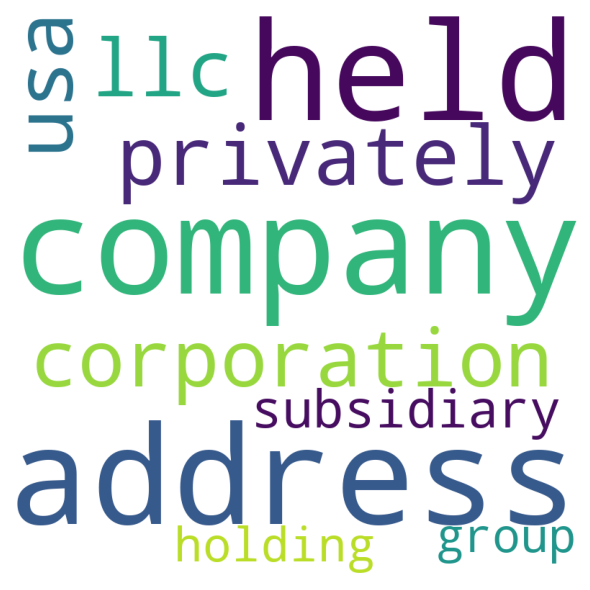

In [141]:
# Python program to generate WordCloud

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

for word in TOPICS.iloc[0,:10]:
#     print(word)
    comment_words +=  word + " "
    
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = stopwords,
    min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [167]:
df = pd.read_csv("2_df.csv").rename(columns={"Unnamed: 0":'company_num'})

# make a copy of the Industries column and save it to the company_industry variable
company_industry = df.loc[:,'Industry Groups'].copy()

# turn that object into a pandas dataframe
company_industry = pd.DataFrame(company_industry)

unique_inds = company_industry.copy()

# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
# change column to categorical
unique_inds['Industry Groups'] = pd.Categorical(unique_inds['Industry Groups'])

# now convert to codes and save down as new column
unique_inds['code'] = unique_inds['Industry Groups'].cat.codes
unique_inds = unique_inds.reset_index(drop=True)

In [ ]:
df = pd.read_csv("2_df.csv").rename(columns={"Unnamed: 0":'company_num'})

# make a copy of the Industries column and save it to the company_industry variable
company_industry = df.loc[:,'Industry Groups'].copy()

# turn that object into a pandas dataframe
company_industry = pd.DataFrame(company_industry)

unique_inds = company_industry.copy()

# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
# change column to categorical
unique_inds['Industry Groups'] = pd.Categorical(unique_inds['Industry Groups'])

# now convert to codes and save down as new column
unique_inds['code'] = unique_inds['Industry Groups'].cat.codes
unique_inds = unique_inds.reset_index(drop=True)

# Word Clouds for each industry

INDUSTRY: Administrative Services


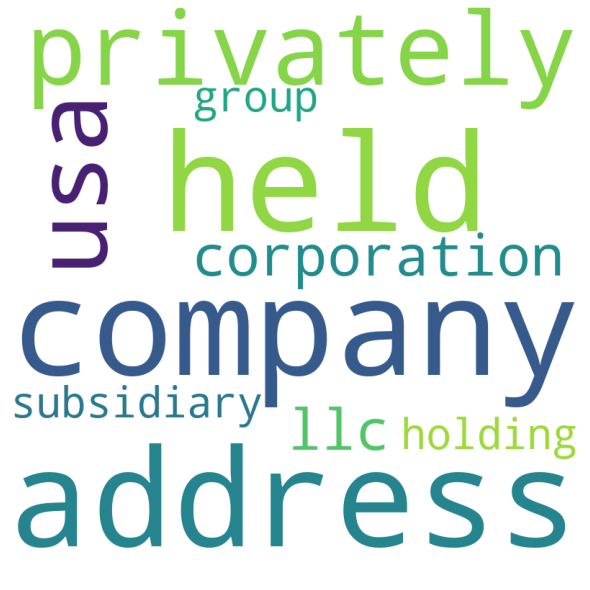

INDUSTRY: Advertising


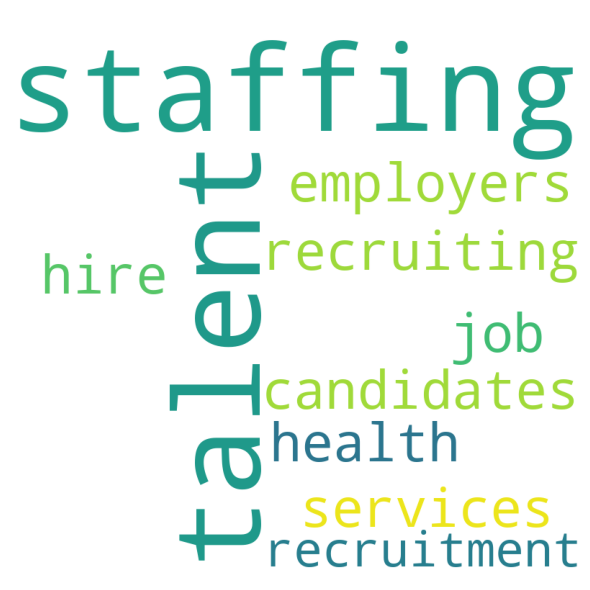

INDUSTRY: Agriculture and Farming


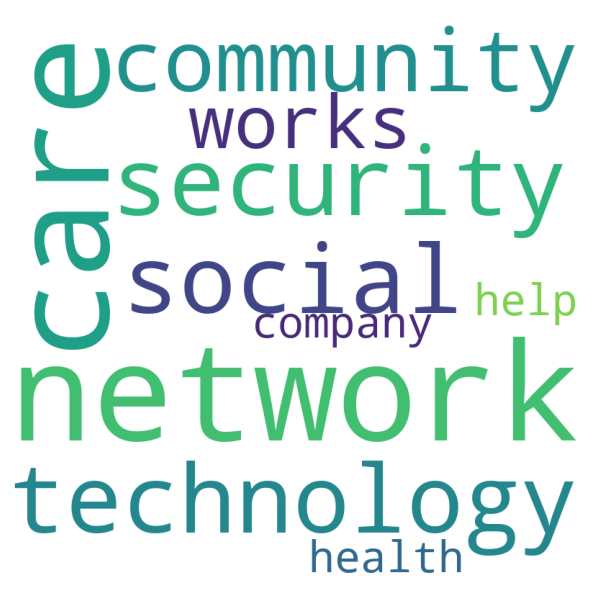

INDUSTRY: Apps


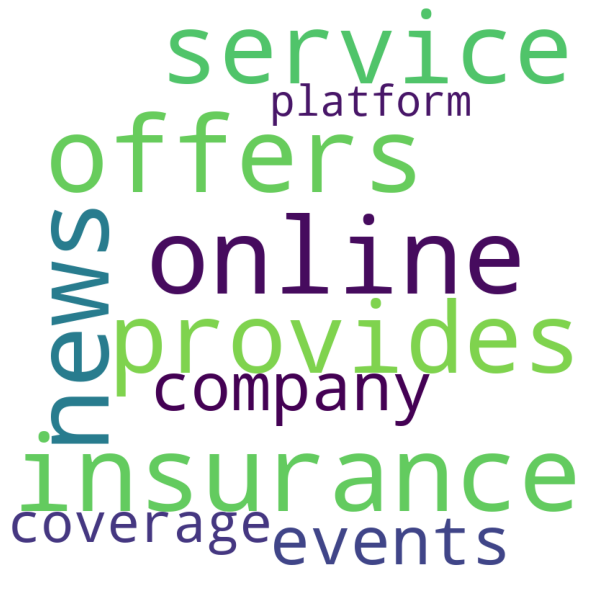

INDUSTRY: Biotechnology


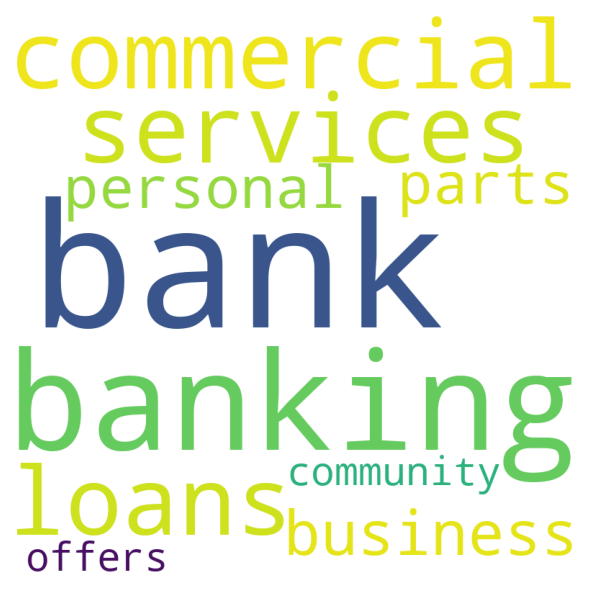

INDUSTRY: Clothing and Apparel


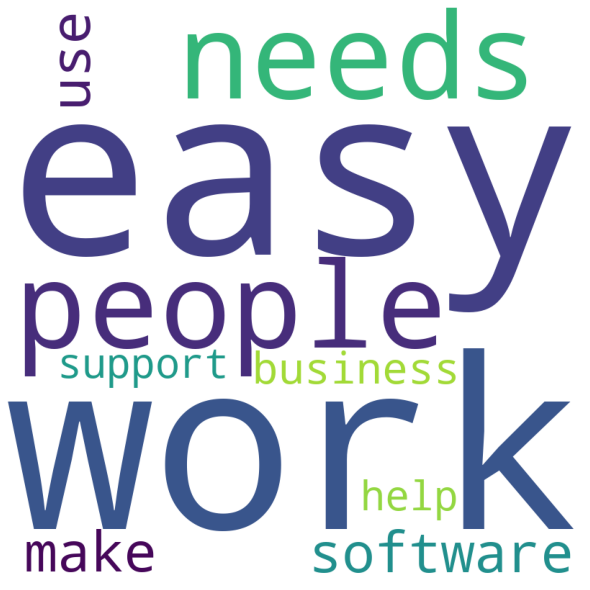

INDUSTRY: Commerce and Shopping


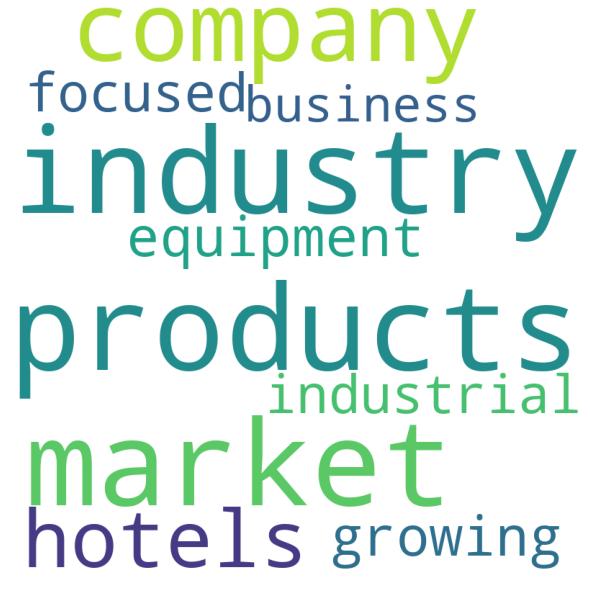

INDUSTRY: Community and Lifestyle


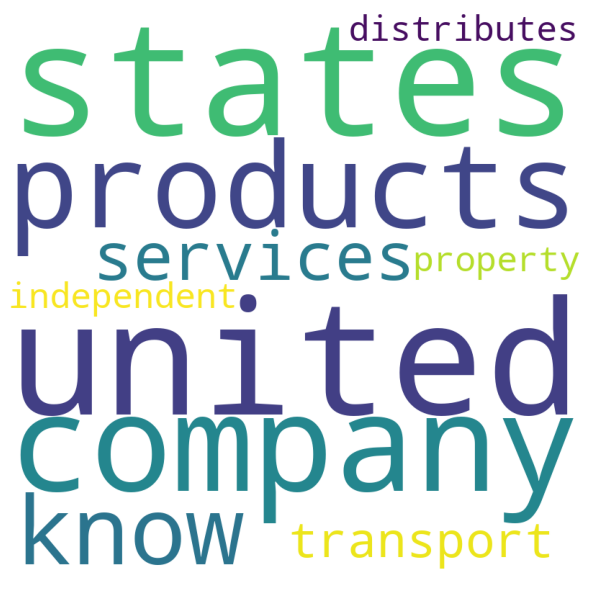

INDUSTRY: Consumer Electronics


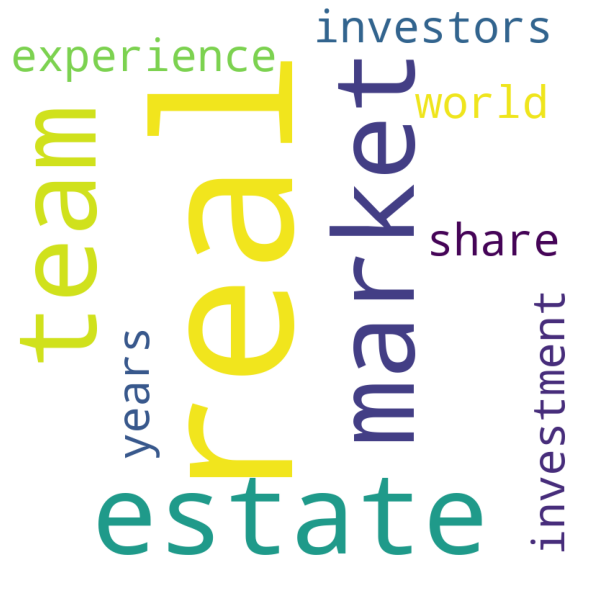

INDUSTRY: Consumer Goods


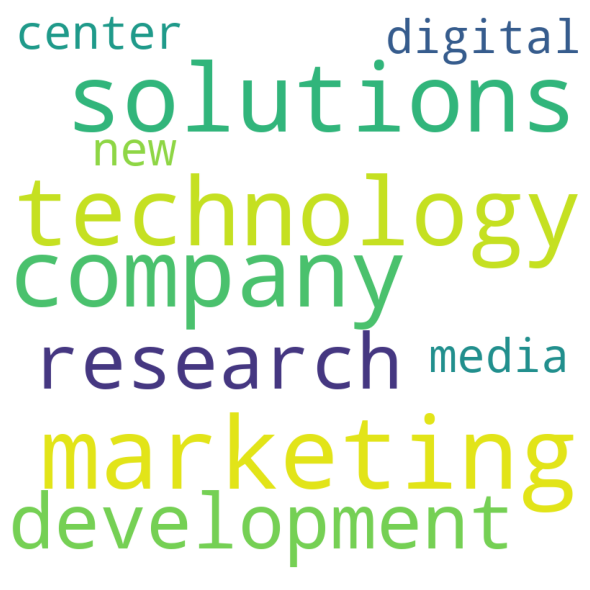

INDUSTRY: Content and Publishing


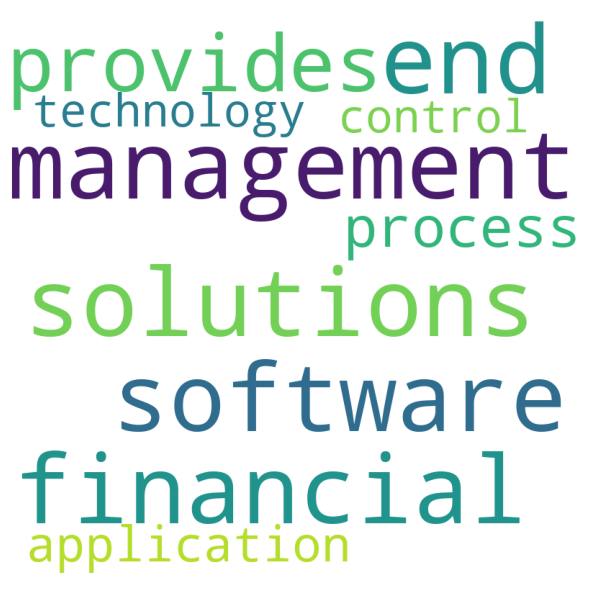

INDUSTRY: Data and Analytics


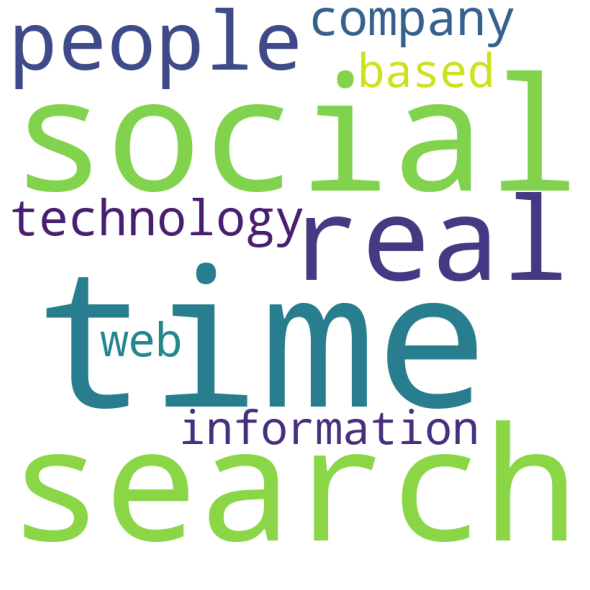

INDUSTRY: Design


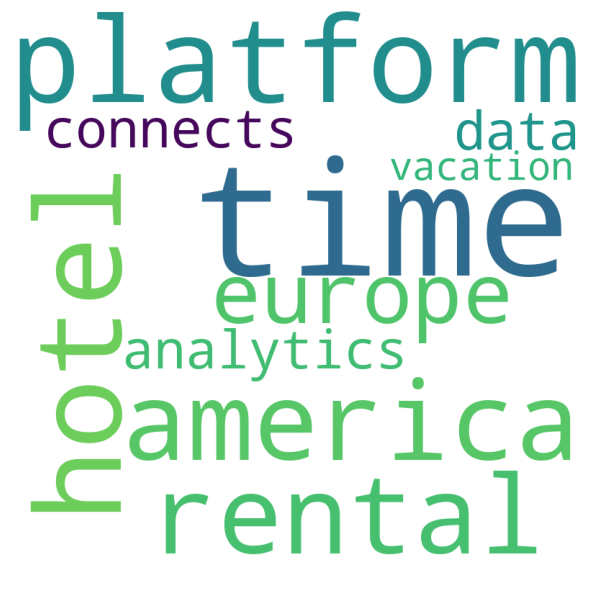

INDUSTRY: Education


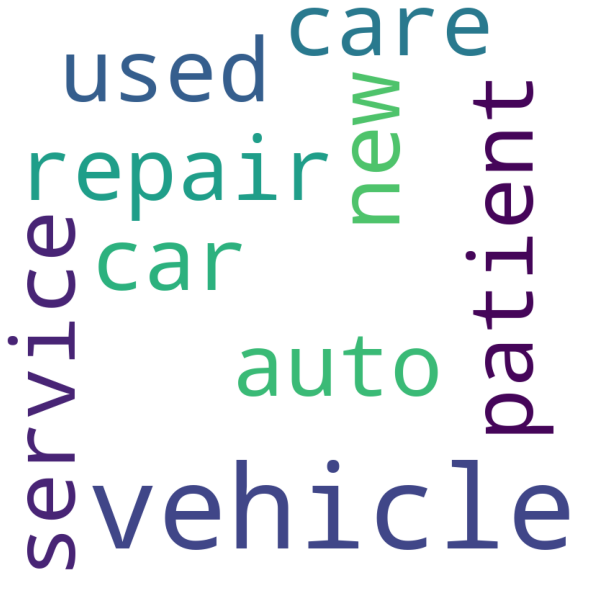

INDUSTRY: Energy


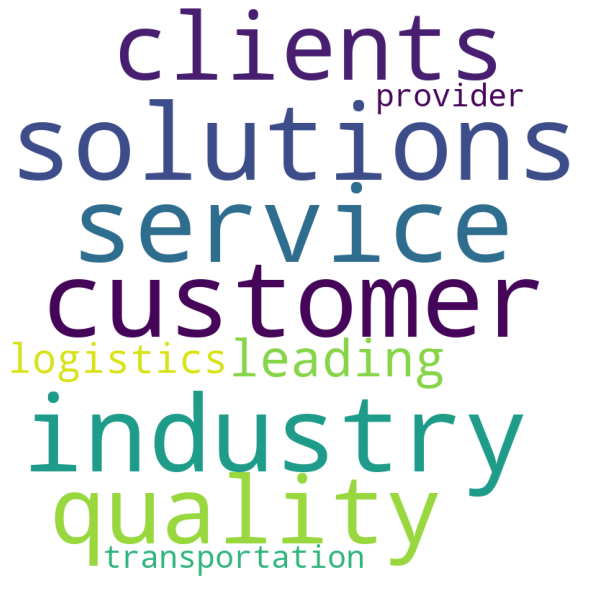

INDUSTRY: Events


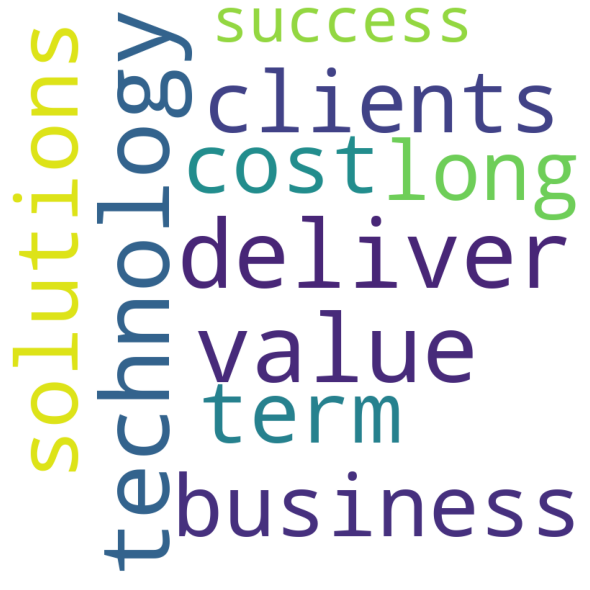

INDUSTRY: Financial Services


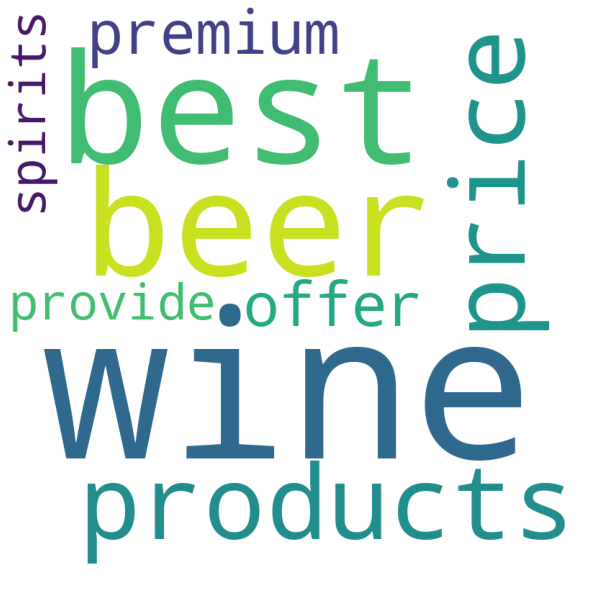

INDUSTRY: Food and Beverage


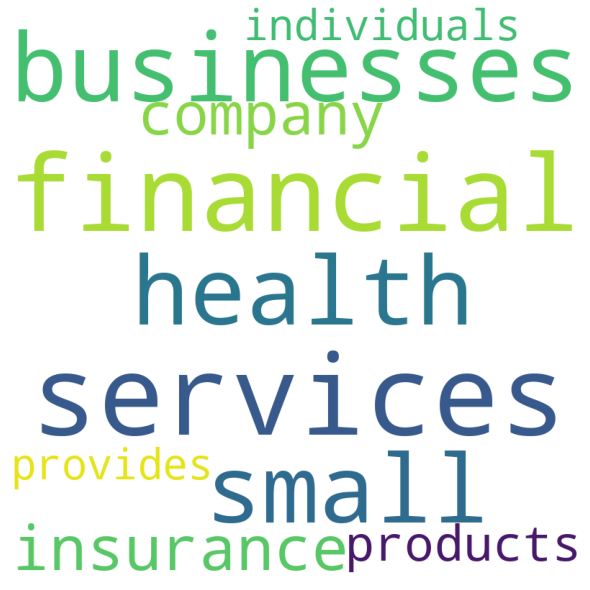

INDUSTRY: Gaming


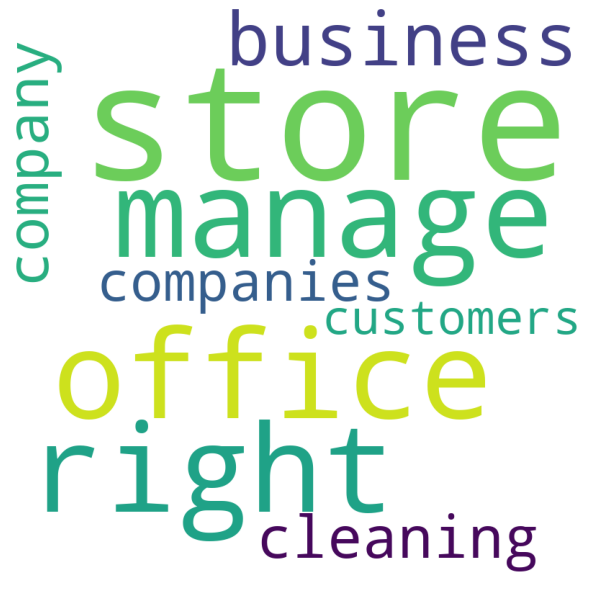

INDUSTRY: Government and Military


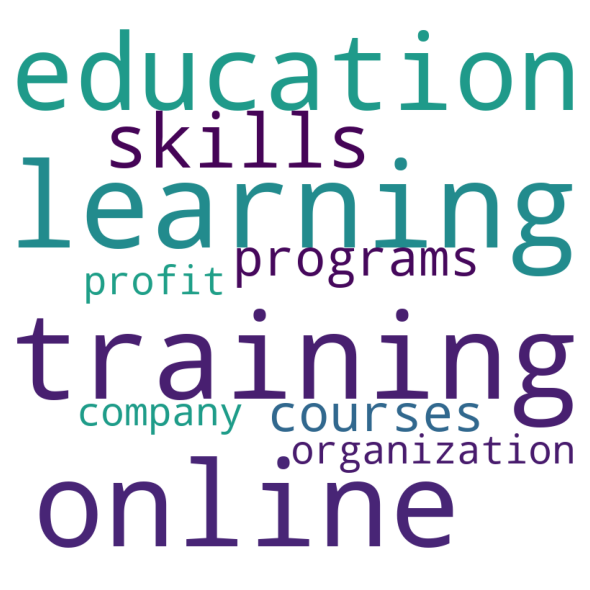

INDUSTRY: Hardware


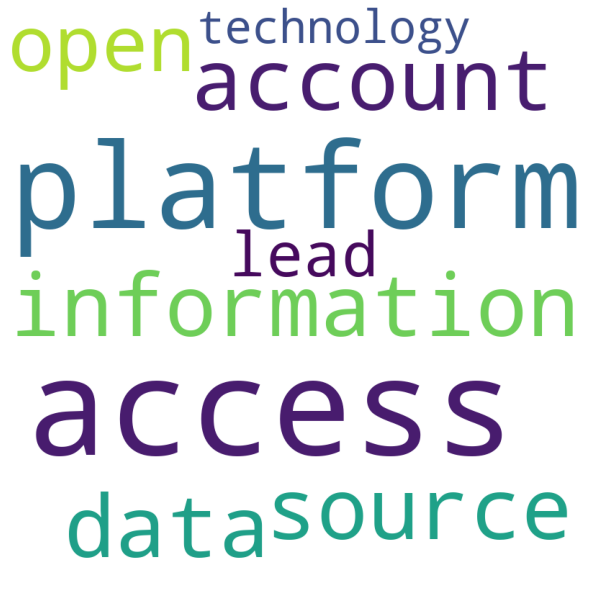

INDUSTRY: Health Care


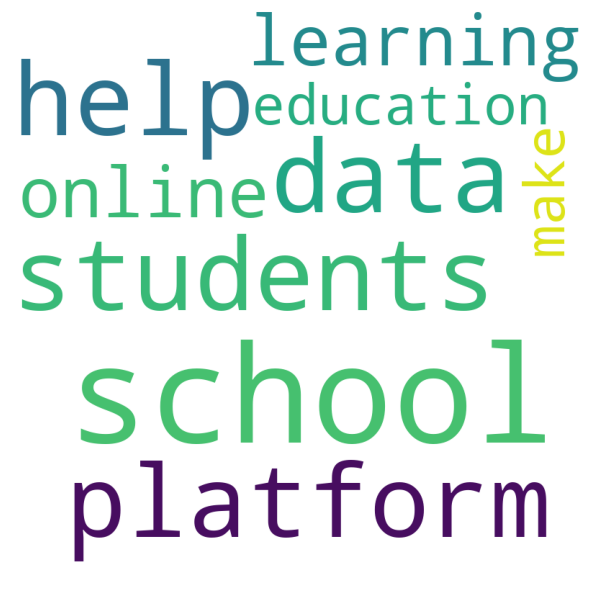

INDUSTRY: Information Technology


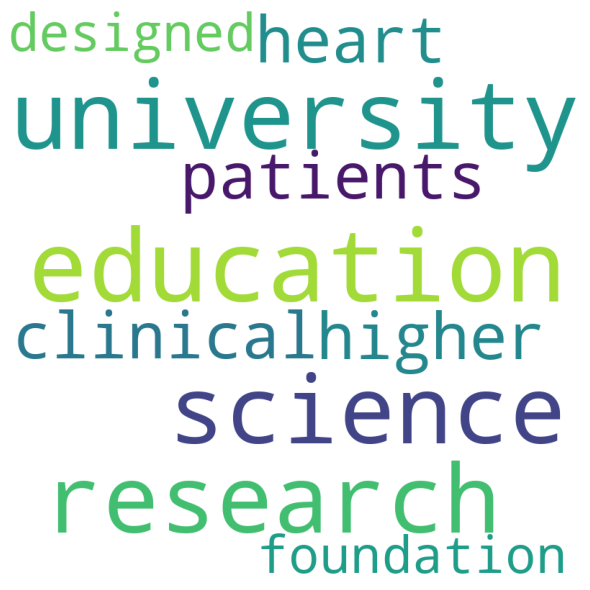

INDUSTRY: Internet Services


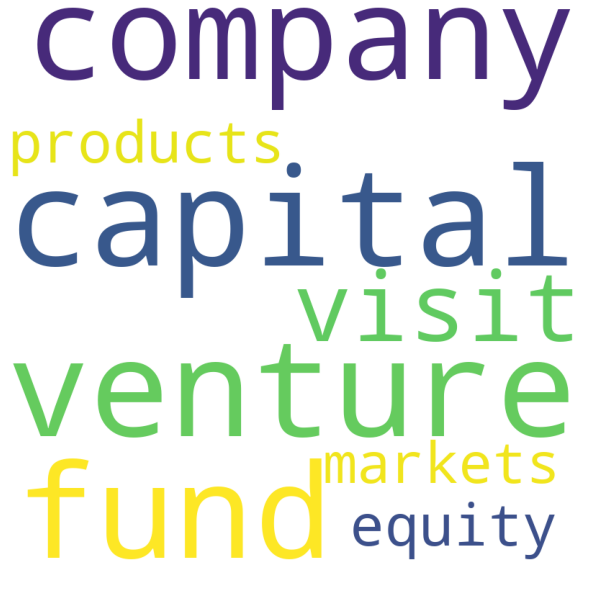

INDUSTRY: Manufacturing


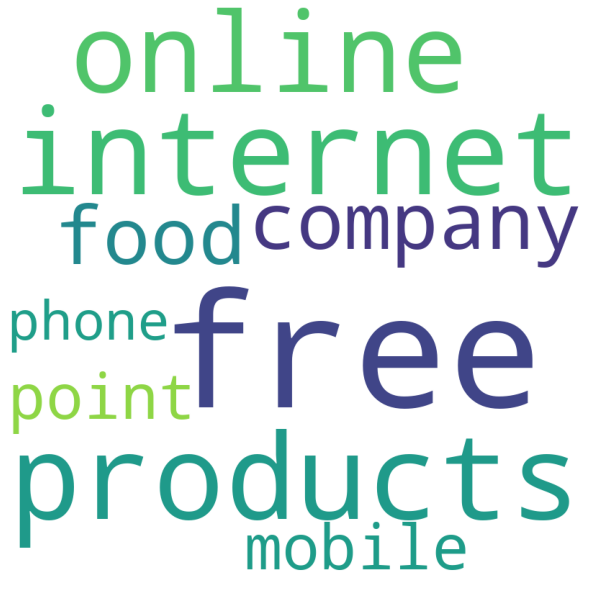

INDUSTRY: Media and Entertainment


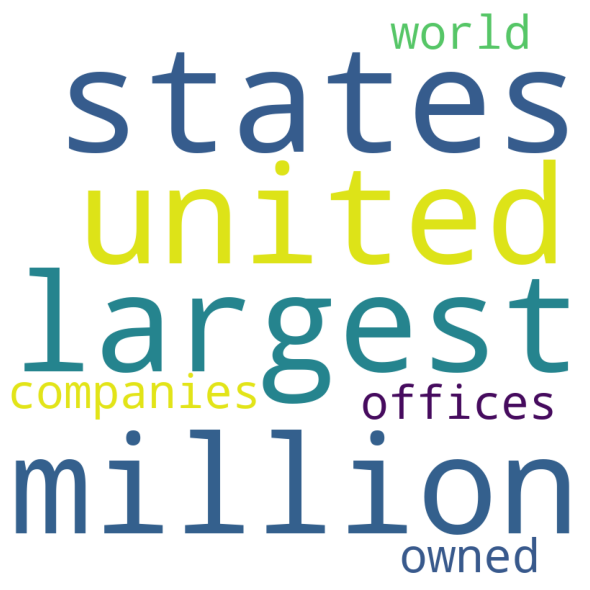

INDUSTRY: Mobile


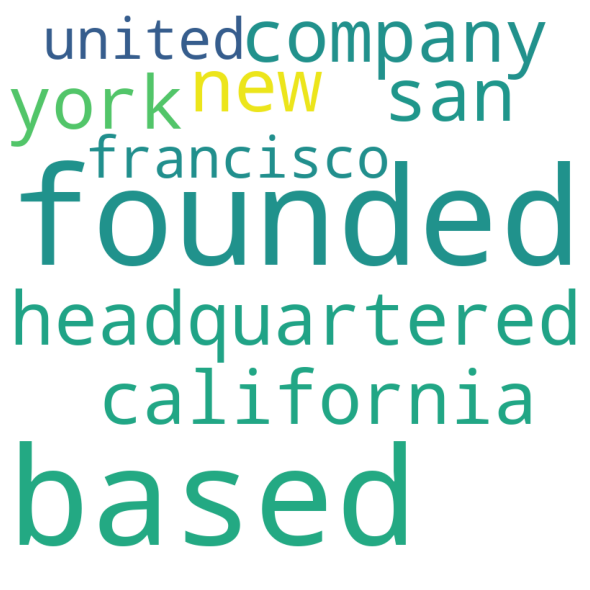

INDUSTRY: Natural Resources


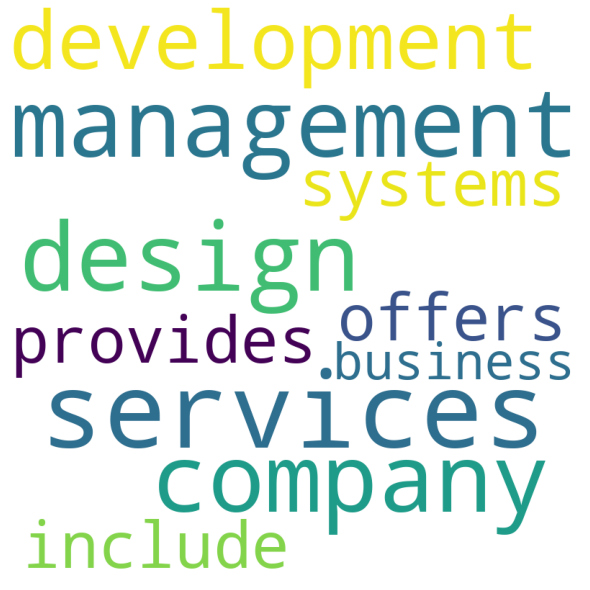

INDUSTRY: Navigation and Mapping


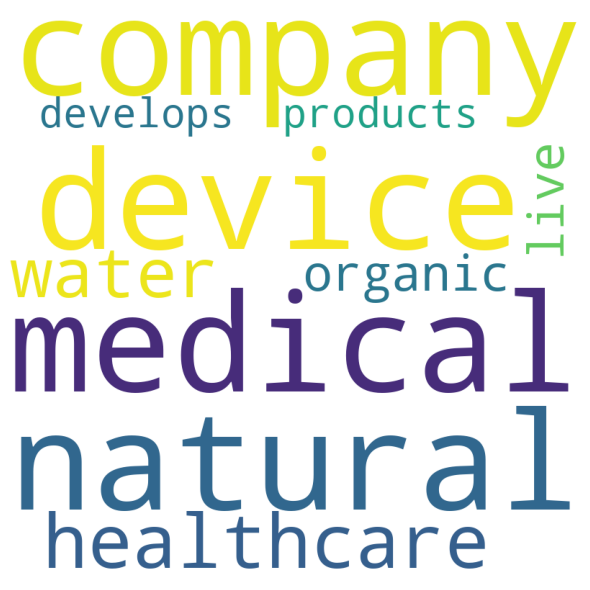

INDUSTRY: Other


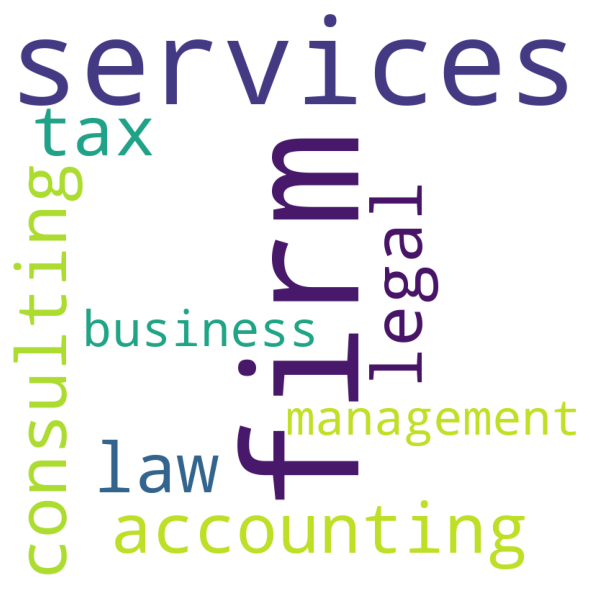

In [171]:
# Python program to generate WordCloud
# https://www.geeksforgeeks.org/generating-word-cloud-python/

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

for i in range(len(TOPICS.index)):
    
    ind = unique_inds[unique_inds['code']==i]["Industry Groups"].reset_index(drop=True)[0]
    print("INDUSTRY: {}".format(ind))
    
    for word in TOPICS.iloc[i,:10]:
    #     print(word)
        comment_words +=  word + " "

    wordcloud = WordCloud(width = 800, height = 800,
        background_color ='white',
        stopwords = stopwords,
        min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()
    
    # reset comment_words at each iteration
    comment_words = ""

In [112]:
# for industry_agg_desc:

TOPICS2 = PHI2.stack().to_frame().rename(columns={0:'weight'})\
    .groupby('topic_id')\
    .apply(lambda x: 
           x.weight.sort_values(ascending=False)\
               .head(10)\
               .reset_index()\
               .drop('topic_id',1)\
               .term_str)

In [113]:
TOPICS2

term_str          0           1           2             3            4  \
topic_id                                                                 
0                00   permanent        penn  pennsylvania      pension   
1          services     company    staffing       clients    solutions   
2           company    services     service       network       travel   
3              news    business       media      magazine          new   
4                00   permanent        penn  pennsylvania      pension   
5          research        data      market       company     business   
6                00   permanent        penn  pennsylvania      pension   
7             world        team      sports       company          new   
8                00   permanent        penn  pennsylvania      pension   
9         marketing     digital       media        social     business   
10         software  management     company      business    solutions   
11           health     medical     company          care     patients   
12               00   permanent        penn  pennsylvania      pension   
13           sports       games     players       fantasy       gaming   
14          company    services     service      products    solutions   
15         services   financial     company     insurance         bank   
16          company        wine        food       founded     products   
17          company    products       based    technology  development   
18          laundry    cleaning     service      services          dry   
19               00   permanent        penn  pennsylvania      pension   
20           public    security  government        safety       states   
21               00   permanent        penn  pennsylvania      pension   
22               00   permanent        penn  pennsylvania      pension   
23        solutions    software  technology      security     services   
24           online         com    products       company       retail   
25               00   permanent        penn  pennsylvania      pension   
26         learning    students   education        online      company   
27           energy     company         gas           oil        power   
28          company        food    software       farmers        based   
29               00   permanent        penn  pennsylvania      pension   

term_str           5               6            7             8            9  
topic_id                                                                      
0             people          pepper      percent    percentage      perfect  
1         management        business    companies          firm     provides  
2          solutions        provides   management        offers     business  
3            company           world   publishing   information      content  
4             people          pepper      percent    percentage      perfect  
5            clients       analytics     services      consumer      reports  
6             people          pepper      percent    percentage      perfect  
7            esports         founded        based  professional         club  
8             people          pepper      percent    percentage      perfect  
9           platform         clients      content      services  advertising  
10          provides           based     services      solution         data  
11        healthcare      technology      patient         based      founded  
12            people          pepper      percent    percentage      perfect  
13            league         esports         game       company        world  
14         customers  transportation      systems      industry          new  
15          business      investment      capital       banking   management  
16             based            beer          new       spirits        wines  
17           founded        research          new          cell         drug  
18          cleaners        business        clean  

**This isn't looking good. I'm going to drop TOPICS2 and just move forward with TOPICS** ... Too many duplicates.

In [114]:
TOPICS['label'] = TOPICS.apply(lambda x: str(x.name) + ' ' + ' '.join(x[:7].astype('str')), 1)

In [115]:
TOPICS.label

topic_id
0     0 company held address privately usa corporati...
1     1 staffing talent recruiting health job servic...
2     2 network care technology security social comm...
3     3 insurance offers online news provides servic...
4     4 bank banking commercial services loans busin...
5            5 easy work people needs software use make
6     6 products industry market company hotels equi...
7     7 united states company products know services...
8     8 real estate market team experience world inv...
9     9 marketing technology company solutions devel...
10    10 management end financial solutions software...
11    11 time search social real people technology c...
12    12 time platform hotel america rental europe a...
13     13 car auto vehicle repair care patient vehicles
14    14 solutions service industry customer quality...
15    15 technology value deliver business clients s...
16       16 best wine wines beer products price premium
17    17 services financial businesses 

### Set Topics by Doc Weight

In [116]:
TOPICS['doc_weight_sum'] = THETA.sum()

In [117]:
TOPICS.sort_values('doc_weight_sum', ascending=True).iplot(
    kind='barh',
    y='doc_weight_sum',
    x='label'
)
#.barh(y='doc_weight_sum', x='label', figsize=(5,10)) 

#### Another interesting way to see the clusters and how similar some of the industries are 
Also an indication that some industries (26, 21, 20, 14, 7) should be easy to classify

In [174]:
px.scatter(TOPICS.reset_index(), 'doc_weight_sum', 'label', hover_name='topic_id', text='topic_id')\
    .update_traces(mode='text')

### Cluster Topics

In [175]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [176]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(5, 10))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left")
    plt.tick_params(axis='both', which='major', labelsize=14)

In [177]:
SIMS = pdist(normalize(PHI), metric='euclidean')
TREE = sch.linkage(SIMS, method='ward')

In [178]:
TOPICS['topterms'] = TOPICS[[i for i in range(10)]].apply(lambda x: ' '.join(x), 1)

In [179]:
labels  = ["{}: {}".format(a,b) for a, b in zip(TOPICS.index,  TOPICS.topterms.tolist())]

#### This will make the clustering we saw in the scatterplot above even clearer:

<Figure size 432x288 with 0 Axes>

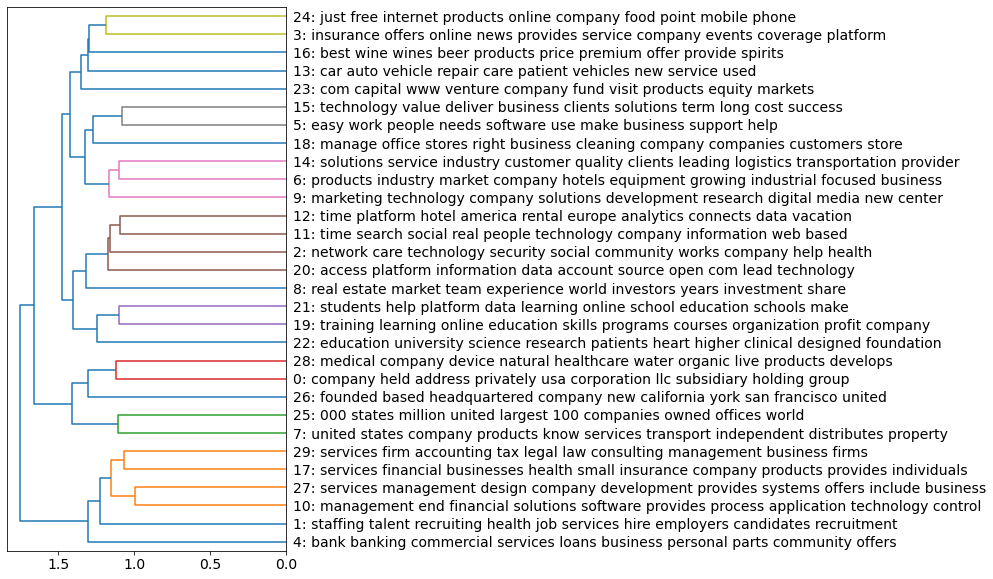

In [180]:
plot_tree(TREE, labels)

# Section 7: Word Embeddings (word2vec and tSNE)

In [181]:
window = 5

In [182]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [183]:
OHCO

['industry_num', 'company_num', 'sent_num', 'token_num']

### Get rid of proper nouns from TOKEN and groupby company_num

In [184]:
gensim_TOKEN = TOKEN[['pos','token_str','term_str','term_id']]
gensim_TOKEN.head()

pos   token_str    term_str  \
industry_num company_num sent_num token_num                                
24           1102        0        0          NNP  ChiliSleep  chilisleep   
                                  1          VBZ          is          is   
                                  2           DT           a           a   
                                  3           JJ       sleep       sleep   
                                  4           NN  technology  technology   

                                             term_id  
industry_num company_num sent_num token_num           
24           1102        0        0             9026  
                                  1            22094  
                                  2             1925  
                                  3            36879  
                                  4            39547

In [185]:
corpus = gensim_TOKEN[~gensim_TOKEN.pos.str.match('NNPS?')]\
    .groupby(OHCO[:2])\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [186]:
len(corpus)

12027

### Generate word embeddings with Gensim's library

In [187]:
corpus = TOKEN[~TOKEN.pos.str.match('NNPS?')].groupby(OHCO[:2]).term_str.apply(lambda x: x.tolist()).reset_index()['term_str'].tolist()

In [188]:
model = word2vec.Word2Vec(corpus, size=246, window=window, min_count=200, workers=4)

## Visualize with tSNE
### Generate coordinates to plot

In [189]:
# turn it into a dataframe
# use property 'wv' = word vectors and then the property 'vocab'
coords = pd.DataFrame(index=range(len(model.wv.vocab))) 
coords['label'] = [w for w in model.wv.vocab]
coords['vector'] = coords['label'].apply(lambda x: model.wv.get_vector(x))

In [190]:
coords.head()

# what we got back from the model was a label with vectors of length 246 (specified above)
# we can convert this vector into column (similar to GloVe) but we aren't going to do that
# and isntead will just jump into visualizing this

label                                             vector
0   student  [0.2587789, -0.5750963, -0.24896799, 0.0305319...
1        is  [0.0051178164, 0.21412715, 0.03314181, -0.2076...
2        an  [0.9366077, -0.887584, -0.06411055, -0.3824928...
3    online  [0.88489115, -0.76165813, -0.5457193, -0.17610...
4  platform  [0.72652376, -0.75709766, -1.1483047, 0.420282...

### Use ScikitLearn's tSNE library

In [191]:
# specifying default values, pulled from documentation online
# perplexity is basically entropy 
# n_components = 2 because we're plotting on a 2-dimensional plane
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

# then fit and transform the coordinates table using the 'vector' column into a list
tsne_values = tsne_model.fit_transform(coords['vector'].tolist())

In [192]:
coords['x'] = tsne_values[:,0]
coords['y'] = tsne_values[:,1]

In [193]:
coords.head()

# the x and y values converted n-dimensional (num vectors) space into 2-dimensional space

label                                             vector          x  \
0   student  [0.2587789, -0.5750963, -0.24896799, 0.0305319...   3.783182   
1        is  [0.0051178164, 0.21412715, 0.03314181, -0.2076...  -8.737613   
2        an  [0.9366077, -0.887584, -0.06411055, -0.3824928...  -4.623902   
3    online  [0.88489115, -0.76165813, -0.5457193, -0.17610...  10.340725   
4  platform  [0.72652376, -0.75709766, -1.1483047, 0.420282...  12.322560   

           y  
0   8.363021  
1  -6.693532  
2 -20.641342  
3   6.752252  
4   7.089733

### Plot the coordinates

In [194]:
px.scatter(coords, 'x', 'y', text='label', height=1000).update_traces(mode='text')

# Section 8: Sentiment Analysis
This draws heavily from the Module 10 notebooks

In [195]:
# Get Lexicon
salex = pd.read_csv('salex_nrc.csv').set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

salex['polarity'] = salex.positive - salex.negative

In [196]:
salex

anger  anticipation  disgust  fear  joy  negative  positive  \
term_str                                                                   
abandon          0             0        0     1    0         1         0   
abandoned        1             0        0     1    0         1         0   
abandonment      1             0        0     1    0         1         0   
abduction        0             0        0     1    0         1         0   
aberration       0             0        1     0    0         1         0   
...            ...           ...      ...   ...  ...       ...       ...   
young            0             1        0     0    1         0         1   
youth            1             1        0     1    1         0         1   
zeal             0             1        0     0    1         0         1   
zealous          0             0        0     0    1         0         1   
zest             0             1        0     0    1         0         1   

             sadness  surprise  trust  polarity  
term_str                                         
abandon            1         0      0        -1  
abandoned          1         0      0        -1  
abandonment        1         1      0        -1  
abduction          1         1      0        -1  
aberration         0         0      0        -1  
...              ...       ...    ...       ...  
young              0         1      0         1  
youth              0         1      0         1  
zeal               0         1      1         1  
zealous            0         0      1         1  
zest               0         0      1         1  

[3688 rows x 11 columns]

In [197]:
# Get lexicon columns
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'polarity']

In [198]:
TOKEN8 = TOKEN.join(salex, on = 'term_str', how='left')

In [199]:
TOKEN8[emo_cols] = TOKEN8[emo_cols].fillna(0)

In [200]:
TOKEN8[emo_cols].mean().sort_values().iplot(
    kind = 'barh'
)

### Sentiment by industry

In [201]:
TOKEN8_industry = TOKEN8.groupby(OHCO[:1])[emo_cols].mean()

In [202]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

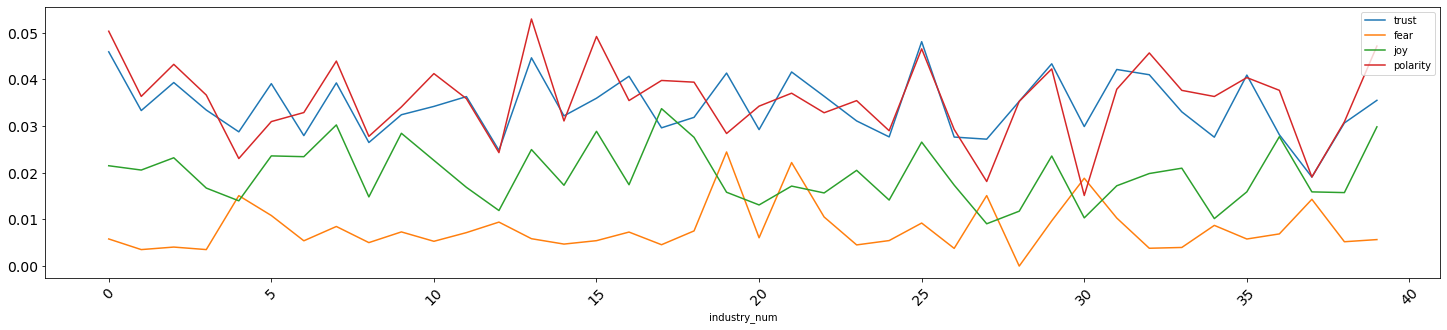

In [203]:
plot_sentiments(TOKEN8_industry, ['trust','fear','joy','polarity'])

**I'm not sure how useful it is to think about sentiment in this way...**

In [204]:
emo = 'polarity'

TOKEN8['html'] =  TOKEN8.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.token_str), 1)

TOKEN8['html'].sample(10)

industry_num  company_num  sent_num  token_num
16            9413         7         29               <span class='sent0'>with</span>
0             44217        0         20             <span class='sent0'>supply</span>
20            5433         1         8              <span class='sent0'>latest</span>
16            35371        3         12               <span class='sent0'>with</span>
              12846        8         8            <span class='sent0'>services</span>
22            32486        7         11                 <span class='sent0'>to</span>
16            11279        4         2                 <span class='sent0'>has</span>
13            21298        0         2                   <span class='sent0'>a</span>
16            32915        0         20            <span class='sent0'>else’s.</span>
              12267        0         13                <span class='sent0'>for</span>
Name: html, dtype: object

In [205]:
TOKEN8_sentences = TOKEN8.groupby(OHCO[:3])[emo_cols].mean()

In [206]:
TOKEN8_sentences['sent_str'] = TOKEN8.groupby(OHCO[:3]).term_str.apply(lambda x: x.str.cat(sep= ' '))
TOKEN8_sentences['html_str'] = TOKEN8.groupby(OHCO[:3]).html.apply(lambda x: x.str.cat(sep= ' '))

In [207]:
def sample_sentences(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [208]:
sample_sentences(TOKEN8_sentences)

**This is cool to see but not really that useful in my ultimate goal of multiclass text classification**

## VADER

In [209]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [210]:
TOKEN8_vader_cols = TOKEN8_sentences.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))
TOKEN8_vader = pd.concat([TOKEN8_sentences, TOKEN8_vader_cols], axis=1)

In [211]:
TOKEN8_vader.head()

anger  anticipation  disgust  fear  joy  \
industry_num company_num sent_num                                            
0            4078        0           0.0           0.0      0.0   0.0  0.0   
                         1           0.0           0.0      0.0   0.0  0.0   
                         2           0.0           0.0      0.0   0.0  0.0   
                         3           0.0           0.0      0.0   0.0  0.0   
                         4           0.0           0.0      0.0   0.0  0.0   

                                   sadness  surprise     trust  polarity  \
industry_num company_num sent_num                                          
0            4078        0             0.0       0.0  0.121212  0.121212   
                         1             0.0       0.0  0.071429  0.071429   
                         2             0.0       0.0  0.000000  0.000000   
                         3             0.0       0.0  0.030303  0.030303   
                         4             0.0       0.0  0.000000  0.000000   

                                                                            sent_str  \
industry_num company_num sent_num                                                      
0            4078        0         law student connect is an online platform that...   
                         1         law student connect supplies answers to the qu...   
                         2         through its marketplace law students prove the...   
                         3         and law student connect is the only online com...   
                         4         the company was founded in 2019 and is based i...   

                                                                            html_str  \
industry_num company_num sent_num                                                      
0            4078        0         <span class='sent0'>Law</span> <span class='se...   
                         1         <span class='sent0'>Law</span> <span class='se...   
                         2         <span class='sent0'>Through</span> <span class...   
                         3         <span class='sent0'>And</span> <span class='se...   
                         4         <span class='sent0'>The</span> <span class='se...   

                                   neg    neu    pos  compound  
industry_num company_num sent_num                               
0            4078        0         0.0  0.749  0.251    0.7506  
                         1         0.0  0.807  0.193    0.2212  
                         2         0.0  0.888  0.112    0.3400  
                         3         0.0  0.761  0.239    0.7964  
                         4         0.0  1.000  0.000    0.0000

<AxesSubplot:xlabel='industry_num,company_num,sent_num'>

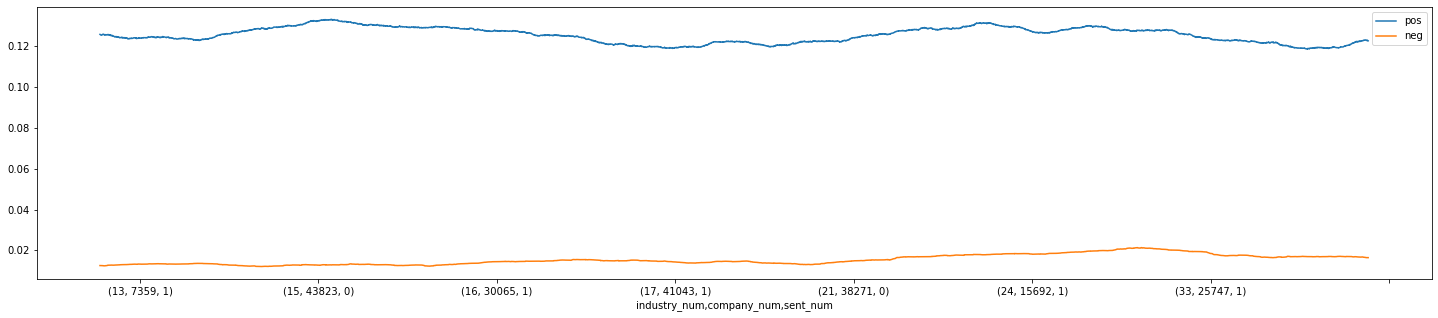

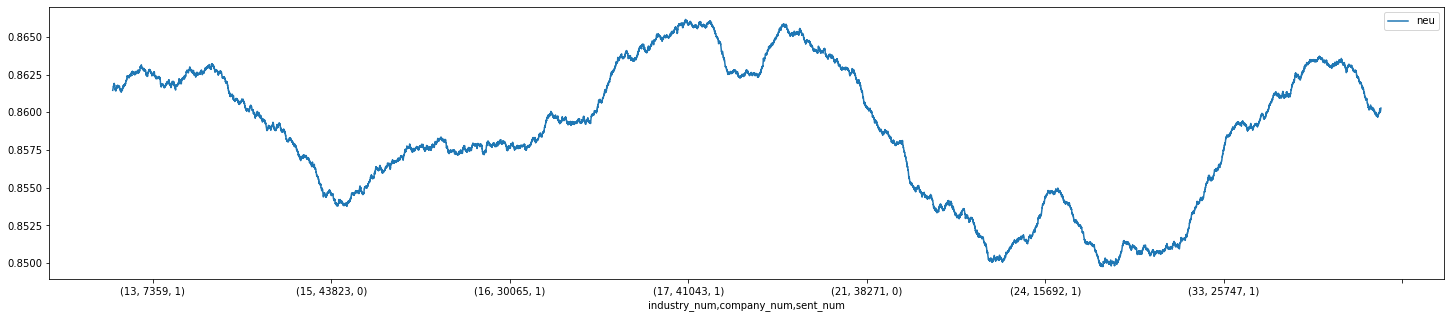

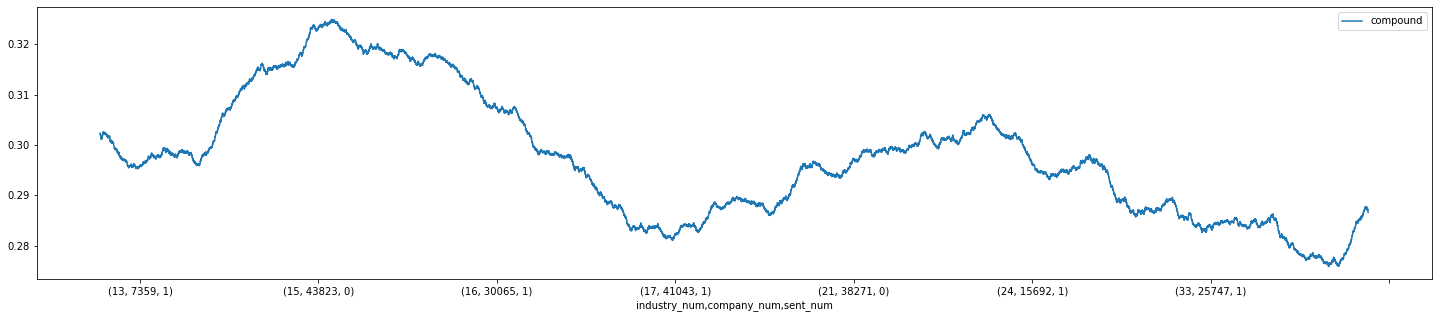

In [212]:
w = int(TOKEN8_vader.shape[0] / 5)
TOKEN8_vader[['pos','neg']].rolling(w).mean().plot(figsize=(25,5))
TOKEN8_vader[['neu']].rolling(w).mean().plot(figsize=(25,5))
TOKEN8_vader[['compound']].rolling(w).mean().plot(figsize=(25,5))

### This is actually pretty cool to see. Unsurprisingly, the sentiment in these sentences are overwhelmingly positive. Given that these are descriptions of companies written by the people who work there, this positivity is to be expected. 

# Section 9: Discrete Cosine Transform (Jockers' DCT)

DCT is a Fourier-related transform similar to the discrete Fourier transform DFT, but using only real numbers.

In [213]:
import scipy as sp 
import scipy.fftpack as fftpack
from sklearn.neighbors import KernelDensity as KDE
from sklearn.preprocessing import scale


In [214]:
COMPANIES = TOKEN8.groupby(OHCO[:3])[emo_cols].mean()

In [215]:
COMPANIES.sample(10)

anger  anticipation  disgust      fear  \
industry_num company_num sent_num                                              
17           40873       0         0.000000      0.000000      0.0  0.000000   
29           38082       2         0.000000      0.027027      0.0  0.054054   
17           40937       3         0.000000      0.000000      0.0  0.000000   
22           26396       0         0.000000      0.000000      0.0  0.000000   
0            32097       3         0.000000      0.025641      0.0  0.000000   
6            24014       8         0.000000      0.000000      0.0  0.000000   
0            45603       1         0.000000      0.000000      0.0  0.000000   
17           41033       0         0.000000      0.000000      0.0  0.000000   
2            14880       1         0.035714      0.000000      0.0  0.000000   
16           4003        2         0.055556      0.111111      0.0  0.111111   

                                        joy  sadness  surprise     trust  \
industry_num company_num sent_num                                          
17           40873       0         0.000000      0.0  0.000000  0.000000   
29           38082       2         0.000000      0.0  0.000000  0.054054   
17           40937       3         0.000000      0.0  0.000000  0.000000   
22           26396       0         0.000000      0.0  0.000000  0.000000   
0            32097       3         0.076923      0.0  0.025641  0.076923   
6            24014       8         0.054054      0.0  0.000000  0.054054   
0            45603       1         0.000000      0.0  0.000000  0.000000   
17           41033       0         0.000000      0.0  0.000000  0.000000   
2            14880       1         0.000000      0.0  0.000000  0.000000   
16           4003        2         0.000000      0.0  0.055556  0.111111   

                                   polarity  
industry_num company_num sent_num            
17           40873       0         0.000000  
29           38082       2         0.000000  
17           40937       3         0.000000  
22           26396       0         0.000000  
0            32097       3         0.102564  
6            24014       8         0.081081  
0            45603       1         0.000000  
17           41033       0         0.000000  
2            14880       1        -0.035714  
16           4003        2         0.111111

In [216]:
titles = {title for title in TOKEN8.index.get_level_values(0)} # set datatype

In [217]:
def get_dct_transform(raw_values, low_pass_size=5, x_reverse_len=100):
    if low_pass_size > len(raw_values):
        raise ValueError('low_pass_size must be les than or equal to the length of raw_values input vector')
    
    values_dct = fftpack.dct(raw_values, type=2) # 4 works well too
    
    keepers = values_dct[:low_pass_size]
    
    padded_keepers = list(keepers) + list(np.zeros(x_reverse_len - low_pass_size))
    
    dct_out = fftpack.idct(padded_keepers)
    
    return(dct_out)

In [218]:
def plot_novel(title, dct=True, low_pass_size=5, x_reverse_len=100, emo='polarity', item=1):
    global COMPANIES, axes, plot_cfg
    
    X = COMPANIES.loc[title, emo].values
    
    if dct:
        method = 'DCT'
        X = get_dct_transform(X, low_pass_size = low_pass_size, x_reverse_len=x_reverse_len)
    else:
        method = 'FFT'
        X = get_transformed_values(X, low_pass_size = low_pass_size, x_reverse_len=x_reverse_len, padding_factor=1)
    
    plot_cfg['title'] = "{} ({})".format(title, method)
    
    pd.Series(X).plot(**plot_cfg, ax=axes[i]);

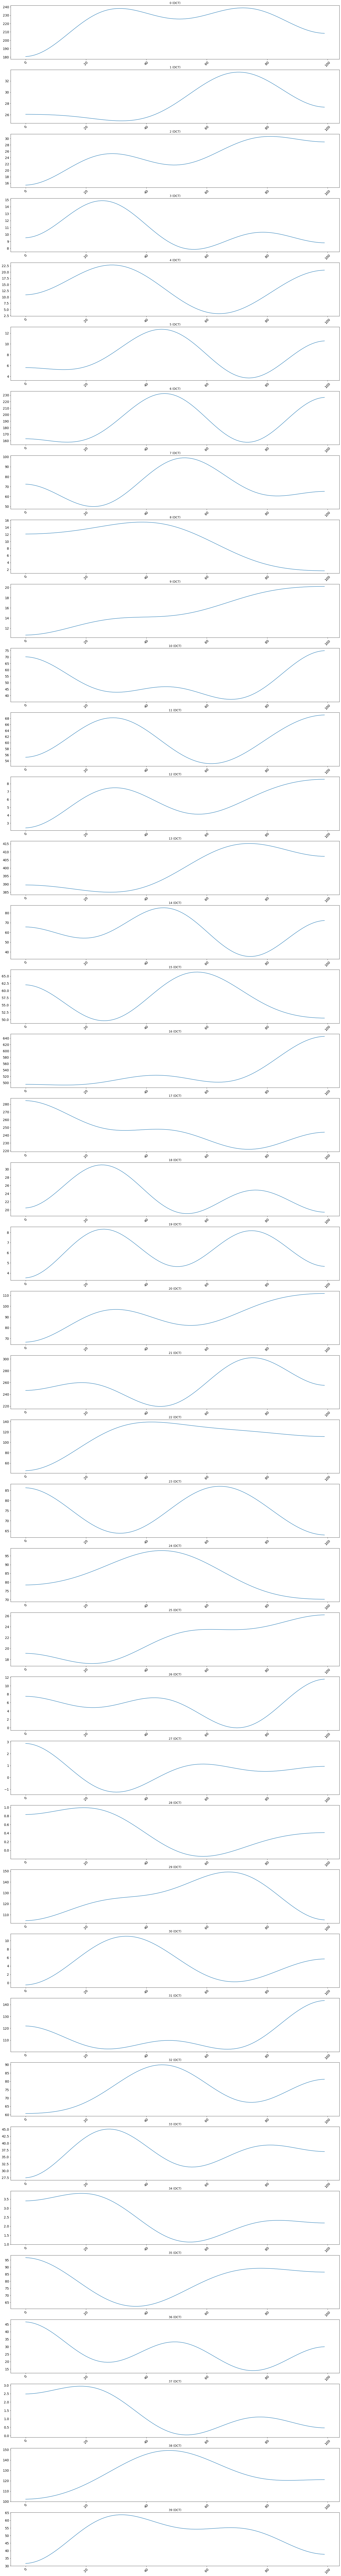

In [219]:
fig, axes = plt.subplots(len(titles), 1)
plot_cfg = dict(
    figsize = (25, 5 * len(titles)),
    legend=False,
    fontsize=14,
    rot=45)

for i, title in enumerate(sorted(titles)):
     plot_novel(title, item=i)

# for i, title in enumerate(sorted(titles)):
#     plot_novel(title, item=i)

# Section 9: Classification with Naive Bayes
This draws heavily from the Module 12 notebooks

**As helpful as all of this data exploration was, I need to start from the top and test/train split before fitting any models**

https://stackoverflow.com/questions/60661508/split-into-test-and-train-set-before-or-after-generating-document-term-matrix

Qualitatively, you don't need to do it either way. However, proper procedure requires that you keep your training and test data entirely separate. The overall concept is that the test data are not directly represented in the training; this helps reduce over-fitting. The test data (and later validation data) are samples that the trained model has never encountered during training.

Therefore, the test data should not be included in your pre-processing -- the document-term matrix. This breaks the separation, in that the model has, in one respect, "seen" the test data during training.

Quantitatively, you need to do the split first, because that matrix is to be used for training the model against only the training set. When you included the test data in the matrix, you obtained a matrix that is slightly inaccurate in representing the training data: it no longer properly represents the data you're actually training against. This is why your model isn't quite as good as the one that followed proper separation procedures.

It's a subtle difference, most of all because the training and test sets are supposed to be random samples of the same population of possible inputs. Random differences provide the small surprise you encountered.

In [ ]:
# Set Hyperparameters
class Params():
    qntile_P = .9
    qntile_N = .1
    n_sets = 4
    smooth_alpha = .1
    binary_mode = True
params = Params()

In [ ]:
import pandas as pd
import numpy as np
from numpy import log2 as log
from numpy import exp2 as exp
from numpy.random import randint

In [ ]:
TOKEN.groupby(OHCO[:3])['Industry_Index'].head()

In [ ]:
df9 = company_desc.drop('desc_len',1).join(LIB["Industry_Index"], on='company_num', how='inner')
df9 = df9.rename(columns={"Industry_Index":"ind"})

In [ ]:
df9.head()

In [13]:
df9.groupby('ind').content.count().iplot(
    kind='bar'
)

NameError: name 'df9' is not defined

"When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is."

https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df9.content).toarray()
labels = df9.ind

features.shape

Now, each 12,031 company descriptions in represented 17,327 features, representing the tf-idf score for different unigrams and bigrams

We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products:

In [ ]:
y = pd.get_dummies(company_industry['Industry Groups']).values

In [ ]:
X = features.copy()

In [ ]:
y.shape, X.shape

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# determining max_words to pass into Embedding
VOCAB.shape

In [ ]:
# determining max number of words for each complaint
max(tokens.groupby('company_num').count()['len_word'])

In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk

import tensorflow as tf 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
X.shape

In [ ]:
X_red = pad_sequences(X, maxlen=300)

X_red.shape

In [ ]:
y.shape

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# chose 300 for max_sequence_length by looking at chart I made near top of notebook

# Set up neural net with layers: dense -> dropout -> softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(45000, 300, input_length=X_red.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.LSTM(256, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(40, activation='softmax')
])


# configure the learning process
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [ ]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

    print("Loaded the plot_curve function.")

In [ ]:
def create_model(my_learning_rate):
    """Create and compile a deep neural net."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a two-dimensional 28X28 array. 
    # Flatten that two-dimensional array into a a one-dimensional 
    # 784-element array.
#     model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # Define the first hidden layer.   
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))

    # Define a dropout regularization layer. 
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer. The units parameter is set to 10 because
    # the model must choose among 10 possible output values (representing
    # the digits from 0 to 9, inclusive).
    #
    # Don't change this layer.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Construct the layers into a model that TensorFlow can execute.  
    # Notice that the loss function for multi-class classification
    # is different than the loss function for binary classification.  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model    


def train_model(model, train_features, train_label, epochs,batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    # To track the progression of training, gather a snapshot
    # of the model's metrics at each epoch. 
    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist    

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=X_test, y=y_test, batch_size=batch_size)

### Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df9['content'], df9['ind'], random_state = 0)
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["ChiliSleep is a sleep technology brand focused on the future of sleep-driven health."])))

In [ ]:
print(clf.predict(count_vect.transform(["It offers on-demand healthcare for people of all ages in the comfort of their own home."])))

In [ ]:
print(clf.predict(count_vect.transform(["8base is a cloud-based platform where front-end developers can build and run enterprise-class web and mobile apps powered by GraphQL."])))

This is the problem with working with unbalanced datasets. Industry_Index==16 is by far the most dominant (see bar chart above), which means that the Naive Bays Classifier was trained more on that than on anything else, ultimately weighting things more as if they were part of Industry_Index==16 than any other industry classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()


In [ ]:
TFIDF

In [ ]:
TF

In [ ]:
DF

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


In [ ]:
OneVsRestClassifier(SVC(kernel='linear'))